<a href="https://colab.research.google.com/github/UN-GCPDS/curso_IA_CHEC/blob/main/Modulo2/cuadernos/Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Logo UNAL CHEC](https://github.com/UN-GCPDS/curso_IA_CHEC/blob/main/logo_unal_chec.jpg?raw=1)


# **MÓDULO 2: APRENDIZAJE SUPERVISADO Y NO SUPERVISADO**

## Descripción:
Modelos de aprendizaje de máquina para análisis de datos tabulares mediante métodos supervisados y no supervisados

### **Profesor - Sesión 3 y 4:** German Castellanos-Dominguez y Diego Armando Pérez Rosero
### **Monitores - Sesión 3 y 4:** Danna Valentina Salazar Dubois, Juan Camilo Lugo Rojas y Lucas Miguel Iturriago Salas

## **Sesión 4:**  Regresión como modelo de dependencia estadística entre parejas de variables aleatorias.

La regresión es un modelo funcional con parámetros aleatorios que establece (predice) valores no observados en variables aletorias interdependientes.

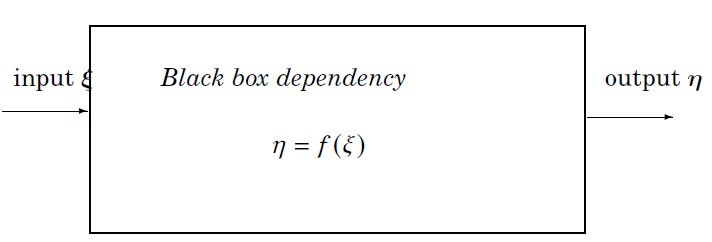

**Dependencia** $f(\cdot)$: [inter]Relación (función) entre dos conjuntos aleatorios $X {\in} \xi$, $Y {\in} \eta$, que interactúan entre sí. \\

$f(\cdot)$ - Caja negra [función] definida sobre variables con valores reales *gobernada por incertidumbre*. \\

Función de dependencia con *significado estadístico*. \\

$
f: \mathbf{X} {\in} \mathbb{R}^{s \times M} \mapsto \mathbf{Y} {\in} \mathbb{R}^{r \times M}
$

**Entrada**. *Variable[s] independiente[s]* o predictor[es], $\mathbf{X} {\in} \mathbb{R}^{s \times M}$ \\

**Salida**. *Variable[s] dependientes* o respuesta[s], $\mathbf{Y} {\in} \mathbb{R}^{r \times M}$ \\

*Ejemplo. La dependencia del consumo de energía (o sea, Salida - $\eta$) de factores como (Entradas - $\xi$ ) nivel socioeconómico de usuarios, temperatura del medio ambiente, tipo de vivienda, etc.*.



**Suposiciones sobre modelos de regresión**

$
\mathbf{X} = \begin{bmatrix}
x_{11} & \dots & x_{1M} \\
\vdots & \ddots & \vdots \\
x_{s1} & \dots & x_{sM}
\end{bmatrix}, \mathbf{Y} = \begin{bmatrix}
y_{11} & \dots & y_{1M} \\
\vdots & \ddots & \vdots \\
y_{r1} & \dots & y_{rM}
\end{bmatrix}
$


- $s{=}1$,  $r{=}1$ - modelo simple o SISO (Single Input Single Output). \\
  ⚡ **Ejemplo** ⚡: En el sistema de distribución de energía se predice la dependencia del consumo de energía ($r=1$) de la distancia al centro de la ciudad ($s=1$) \\
- $s {\geq} 2$, $r{=}1$ - modelo múltiple tipo MISO (Multiple Input Single Output). \\
  ⚡ **Ejemplo** ⚡: Dependencia del consumo de energía ($r=1$) de la distancia al centro de la ciudad, el costo de cada vivienda, la cantidad de pisos y  la cantidad de personas que la habitan ($s{=}4$) \\
- $s {\geq} 2$, $r{\geq}2$ -modelo múltiple tipo MIMO (Multiple Input Multiple Output). \\
  ⚡ **Ejemplo** ⚡: Dependencia del consumo de energía  y cartera morosa ($r=2$) de la distancia al centro de la ciudad, el costo de cada vivienda, la cantidad de pisos, hay carro en la vivienda y  la cantidad de personas que la habitan ($s{=}5$) \\

- $M{=}1$ - modelos univariados. \\
  ⚡ **Ejemplo** ⚡: Dependencia del consumo de energía de la distancia al centro de la ciudad, tomada solamente a lo largo de la calle 23 \\
- $M{\geq} 2$ - modelos multivariados. \\
  ⚡ **Ejemplo** ⚡: Dependencia del consumo de energía de la distancia al centro de la ciudad, tomada a lo largo de 30 calles de la ciudad, $M{=}30$

---

- Observaciones Independientes e Idénticamente Distribuidas (i.i.d.).  \\
  Se asume de las observaciones de consumo son independientes  una de otra cualquiera que sea el orden de su toma, pero siguen la misma distribución.  
- Un valor constante de  varianza en residuales (**Homocedasticidad**). \\
  Los errores del modelo (residuales) tienen varianza constante a lo largo del modelo. ⚡ **Ejemplo** ⚡: Al final de la carrera 23, llegando a las zonas suburbanas, hay condominios  de muy variada naturaleza que pueden estar seguidos por unos de superlujo y luego otros son barrios marginales, etc.
---


In [1]:
!git clone https://github.com/UN-GCPDS/curso_IA_CHEC.git # Copiar el respositorio de GitHub del curso

Cloning into 'curso_IA_CHEC'...
remote: Enumerating objects: 1001, done.
remote: Counting objects: 100% (248/248), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 1001 (delta 147), reused 223 (delta 133), pack-reused 753 (from 1)
Receiving objects: 100% (1001/1001), 42.81 MiB | 12.06 MiB/s, done.
Resolving deltas: 100% (639/639), done.
Updating files: 100% (30/30), done.


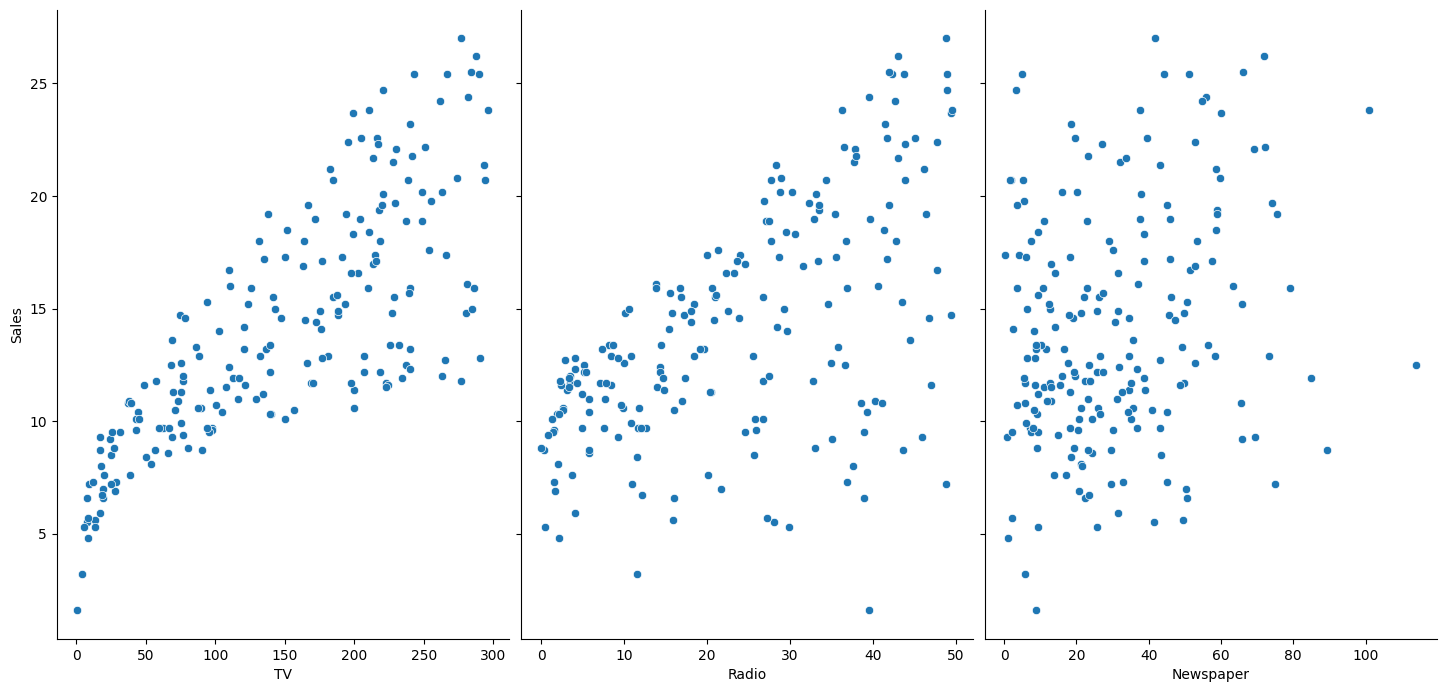

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd

ad_data = pd.read_csv('/content/curso_IA_CHEC/Modulo2/database/Advertising.csv',index_col='Unnamed: 0')

_ = sns.pairplot(ad_data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7)

**Aspectos básicos para construir una dependencia estadística**

- ¿Qué  medidas de incertidumbre se pueden utilizar para evaluar la relación entre un par de variables aleatorias (si existe alguna interacción)?

- ¿El modelo propuesto  (regresor) asocia todo el conjunto de variables involucradas, o solo una parte de ellas está contribuyendo al modelo?

- A propósito, ¿Cómo evaluar la contribución de cada variable al modelo?  

- ¿Cómo evaluar la efectividad entre diferentes modelos de relación? ¿El modelo proporciona una asociación explicable entre variables?



**Formulación Estadística del Modelo de Dependencia**


Sea $X {\subset} \mathbb{R}^s$ e $Y {\subset} \mathbb{R}^r$ dos conjuntos de observación, que se asumen estadísticamente dependedientes mediante la función $f : \mathbb{R}^s \mapsto \mathbb{R}^r$,  para la cual la media condicional alcanza su valor mínimo, en términos de la métrica de ajuste $d(\tilde{y}, y)$,  definida de la siguiente manera: \\

$
\tilde{y} = \mathbb{E} \{y = Y \mid x = X\} \\
  \qquad \text{tal que: } d(\tilde{y}, y) - \epsilon = 0, \quad \epsilon \in \mathbb{R}^+
\tag{1}
$
donde $\epsilon$ es el error de ajuste medido por la métrica $d(,)$ mientras $\tilde{y} = f(x = X)$ es la estimación  de la dependencia.

O sea, cuando a la salida se tienen las observaciones $y$ mientras a la entrada se mide $x=X$, entonces, en promedio se relacionan mediante la función $f$, esto  es, \\
  *La relación asumida resulta en el modelo de regresión de* $y$ *sobre* $x$

$
y = f(x; \Theta) + \sigma \varepsilon, \quad \sigma \in \mathbb{R}^+, \quad \Theta = [\theta_k : k \in K]
\\
\qquad \text{tal que: } \mathbb{E} \{\epsilon \mid x \} = 0
\tag{2}
$

donde $\Theta$ es el conjunto de parámetros que describe modelo de regresión y los cuales deben ser estimados:  $\tilde{y} = f(X;\tilde{\Theta})$

---

En general,  la función  $f$ **es desconocida o poco se sabe de ella**. Dos enfoques para desarrolar el modelo de regresión  Ec. (2):

- Se asume una función aproximada de relación, basándose en cierta evidencia empírica, **prefiriendo la interpretación del regresor**.
- $f(\cdot)$ se infiere a partir de conjuntos de observación mediante enfoques de aprendizaje basados en datos, **prefiriendo minimizar el error de ajuste, sin importar la interpretabilidad del regresor**.


Cabe mencionar, que hay métricas de ajuste $d(,)$ de diferentes naturalezas y que resultan convenientes en diferentes aplicaciones o problemas específicos. Entre las dos más usadas se encuentran la distancia $L_1$:

$$
\| \mathbf{x} - \mathbf{y} \|_1 = \sum_{i=1}^{n} |x_i - y_i|
$$

y la distancia $L_2$:
$$
\| \mathbf{x} - \mathbf{y} \|_2 = \left( \sum_{i=1}^{n} (x_i - y_i)^2 \right)^{1/2}
$$

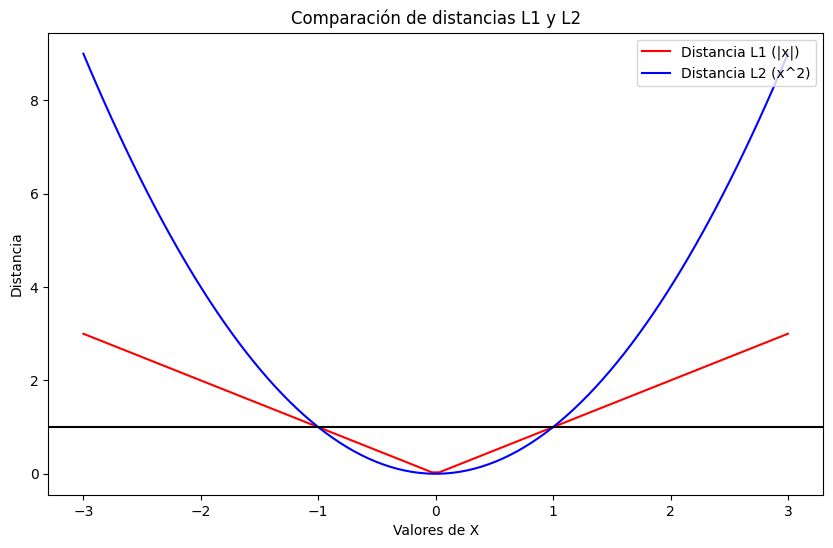

In [4]:
# @title
import matplotlib.pyplot as plt
# Simulating values for distances L1 and L2
x_vals = np.linspace(-3, 3, 100)
y_vals_L1 = np.abs(x_vals)  # L1: Absolute distance
y_vals_L2 = x_vals**2  # L2: Squared distance

# Plotting the L1 and L2 distances on a log scale
plt.figure(figsize=(10, 6))

# Plotting the L1 and L2 distances using a semilogarithmic y-axis
plt.plot(x_vals, y_vals_L1, "red", label='Distancia L1 (|x|)')
plt.plot(x_vals, y_vals_L2, "blue", label='Distancia L2 (x^2)')

# Horizontal reference line at y=1
plt.axhline(y=1, color='k', linestyle='-')

# Adding legend and labels
plt.legend(loc='upper right')
plt.title('Comparación de distancias L1 y L2')
plt.xlabel('Valores de X')
plt.ylabel('Distancia')

# Displaying the plot
plt.show()

**Modelo de Regresión Lineal**

Se asume una función lineal:

- Mejor capacidad de generalización
- Modelos altamente interpretables

---

Valores medidos y perturbados por el  ruido de medida: \\
 \\
$
y = \theta_1 x + \theta_0 + \sigma \epsilon, \quad \theta = [\theta_0, \theta_1], \quad K = 2
$

---
- $y$ - variable dependiente  
- $x$ - variable independiente  
- $\theta_1$ pendiente, $\theta_0$ intercepto  
- $\sigma \varepsilon$ - componente aleatorio (error)
---


## [**Estimación de los parámetros del modelo de**] **regresión SIMPLE lineal**

### Primer enfoque: *Interpretación directa de Ec (1)*

Promedio de valores observados de los parámetros de dependencia lineal. (No mucha estadística!) \\

$
\qquad \theta_1 = \frac{y_i - y_j}{x_i-x_j} = \frac{\Delta y}{\Delta x}
\\
 \qquad \theta_0 = y_i - y_ j \\
$
\\

Promediando sobre un número significativo de valores observados, se tiene \\

$  
\qquad \tilde{\theta_k} = \mathbb{E} \{\theta_k(i-j): \forall i,j\}
$

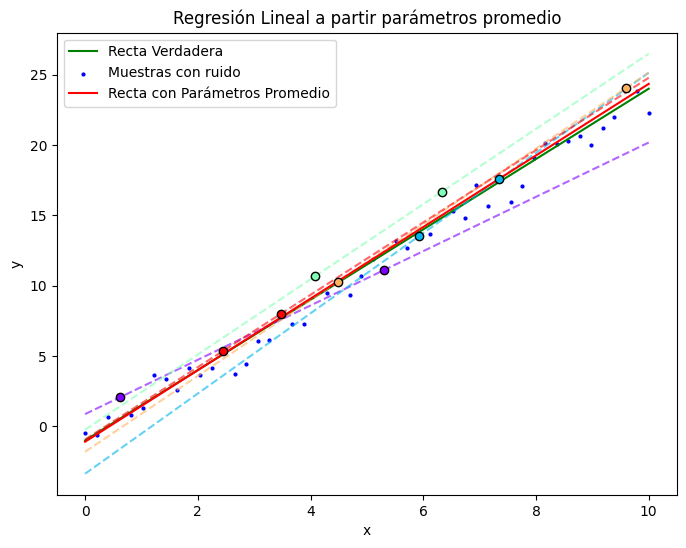

In [5]:
# @title
# Semilla para reproducibilidad
np.random.seed(42)

# Generar una muestra de puntos a lo largo de una recta verdadera con ruido
n_puntos = 50
x = np.linspace(0, 10, n_puntos)
pendiente_verdadera = 2.5
intercepto_verdadero = -1
ruido = np.random.normal(0, 1, n_puntos)
y = pendiente_verdadera * x + intercepto_verdadero + ruido

# Seleccionar algunos pares de puntos para estimar pendiente e intercepto
n_pares = 5
pares_idx = np.random.choice(range(n_puntos), (n_pares, 2), replace=False)

# Calcular las pendientes e interceptos para los pares seleccionados
pendientes = []
interceptos = []
for idx1, idx2 in pares_idx:
    pendiente = (y[idx2] - y[idx1]) / (x[idx2] - x[idx1])
    intercepto = y[idx1] - pendiente * x[idx1]
    pendientes.append(pendiente)
    interceptos.append(intercepto)

# Calcular pendiente e intercepto promedio
pendiente_promedio = np.mean(pendientes)
intercepto_promedio = np.mean(interceptos)

# Crear figura
plt.figure(figsize=(8, 6))

# Graficar la recta verdadera
plt.plot(x, pendiente_verdadera * x + intercepto_verdadero, label='Recta Verdadera', color='green')

# Graficar los puntos sampleados con ruido
plt.scatter(x, y, label='Muestras con ruido', color='blue', s=4)

# Colores para las rectas de los pares de puntos
colores = plt.cm.rainbow(np.linspace(0, 1, n_pares))

# Graficar las rectas para los pares de puntos seleccionados, con el mismo color para cada par
for (idx1, idx2), pendiente, intercepto, color in zip(pares_idx, pendientes, interceptos, colores):
    # Graficar la recta
    plt.plot(x, pendiente * x + intercepto, linestyle='--', color=color, alpha=0.6)
    # Graficar los pares de puntos
    plt.scatter([x[idx1], x[idx2]], [y[idx1], y[idx2]], color=color, edgecolor='black', zorder=5)

# Graficar la recta correspondiente a la pendiente e intercepto promedios
plt.plot(x, pendiente_promedio * x + intercepto_promedio, label='Recta con Parámetros Promedio', color='red')

# Etiquetas y leyenda
plt.title('Regresión Lineal a partir parámetros promedio')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


# Mostrar gráfico
plt.show()

### Segundo enfoque: *Cálculo empírico*

Sobre los observados para los parámetros de dependencia lineal, se rota la recta hasta que se encuentre la que menor error genere. (rotar la varita mediante métodos heurísticos!)\\

Por cuanto,
 $
\qquad \theta_1 = \frac{\Delta y}{\Delta x}
   \\
$ \\
se rota la recta para minimizar $\Delta y$, luego se cambia $\Delta x$ para seguir disminuyendo el valor hasta donde sea posible. Seguidamente, vuelve a rotarse la varita, se cambia $\Delta x$, ... y así , sucesivamente, hasta donde se pueda obtener el menor error de ajuste

Promediando sobre un número significativo de valores observados, se tiene \\

$  
\qquad \tilde{\theta_k} = \mathbb{E} \{\theta_k(i-j): \forall i,j\}
$


In [6]:
#@title Cálculo de Regresión Lineal
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, IntSlider, Checkbox, interact
from sklearn.metrics import mean_squared_error
np.random.seed(42)

# Función para generar datos de una línea recta y añadir ruido
def generate_data(theta0, theta1, sigma):
    n_points = 100
    np.random.seed(42)
    # Generar valores de X aleatorios en un rango más amplio (0 a 10)
    X = 10 * np.random.rand(n_points, 1)

    # Generar la línea recta original
    y_original = theta1 * X + theta0

    # Añadir ruido a los datos
    noise = sigma * np.random.randn(n_points, 1)
    y_noisy = y_original + noise

    return X, y_original, y_noisy

# Clase para visualizar los datos generados
class LinearDataVisualizer:
    def __init__(self, theta0, theta1, sigma):
        self.theta0 = theta0
        self.theta1 = theta1
        self.sigma = sigma
        self.X = None
        self.y_original = None
        self.y_noisy = None

    # Función para generar datos y plotear con la opción de mostrar o no la línea original
    def fit_user_line(self, theta0_user, theta1_user, show_original):
        # Generar los datos
        self.X, self.y_original, self.y_noisy = generate_data(self.theta0, self.theta1, self.sigma)

        # Generar la línea ajustada por el usuario
        y_user = theta1_user * self.X + theta0_user

        # Calcular el error cuadrático medio (MSE) entre la línea ajustada y los puntos con ruido
        mse = mean_squared_error(self.y_noisy, y_user)

        # Graficar
        plt.figure(figsize=(10, 6))

        if show_original:
            plt.plot(self.X, self.y_original, 'g-', label='Línea original')  # Línea original sin ruido

        plt.scatter(self.X, self.y_noisy, color='r', s=10, label='Datos con ruido')  # Datos con ruido
        plt.plot(self.X, y_user, 'b--', label=f'Línea ajustada (Error = {mse:.4f})')  # Línea ajustada por el usuario

        plt.xlabel("$x$", fontsize=14)
        plt.ylabel("$y$", fontsize=14)
        plt.title(f"Ajuste de la línea por el usuario")
        plt.ylim((0, 35))
        plt.legend()
        plt.show()

# Instanciar la clase
visualizer = LinearDataVisualizer(theta0=2, theta1=3, sigma=0.5)

# Añadir controles para que el usuario ajuste la recta, vea el error y controle si se muestra la línea original
interact(visualizer.fit_user_line,
         theta0_user=FloatSlider(min=-10, max=10, step=0.1, value=1, description='Intercepto Usuario'),
         theta1_user=FloatSlider(min=-10, max=10, step=0.1, value=2, description='Pendiente Usuario'),
         show_original=Checkbox(value=False, description='Mostrar línea original'));


interactive(children=(FloatSlider(value=1.0, description='Intercepto Usuario', max=10.0, min=-10.0), FloatSlid…

### Tercer enfoque: *Estimación óptima por $\ell_2$*


**Método [*Ordinario*] de Mínimos Cuadrados**: *Ordinary Least Squares (OLS) -- with no special or distinctive features; normal.*

Formalización de la tarea de estimación óptima de parámetros de modelos  de regresión lineal tipo SISO \\
Sea el siguiente modelo *simple* de regresión lineal, con parámetros $\pmb{\theta}$:

$
\qquad y= X\pmb{\theta} + \epsilon, \quad s.t.: \mathbb{E} \{\epsilon \mid x= X\} \to 0 \\
$ \\

para el cual, se propone **minimizar la distancia**  medida por $\ell_2$ (potencia del error) entre los predictores y la salida, de la siguiente forma \\

$
\qquad {\tilde{\pmb{\theta}}}	  = 	\min_{\pmb\theta}{\;\pmb\varepsilon} = \mathbb{E} \{\|{y} - {X} \pmb{\theta} \|^{2}\},
\\
$

Para minimizar, se deriva por $\pmb{\tilde{\varepsilon}}^{2}$ y, luego, se iguala a cero, resultando en una expresión analítica (suma residual de cuadrados!):

$
		\tilde{\theta}_1 =\frac{(\sum y)(\sum x^{2}) - (\sum x)(\sum xy)}{M(\sum x^{2})-(\sum x^{2})},\, M -\textrm{ sample size}\\
		\,\\
		\tilde{\theta}_0 =\frac{M(\sum xy)- (\sum x)(\sum y)}{M(\sum x^{2})-(\sum x^{2})}
$

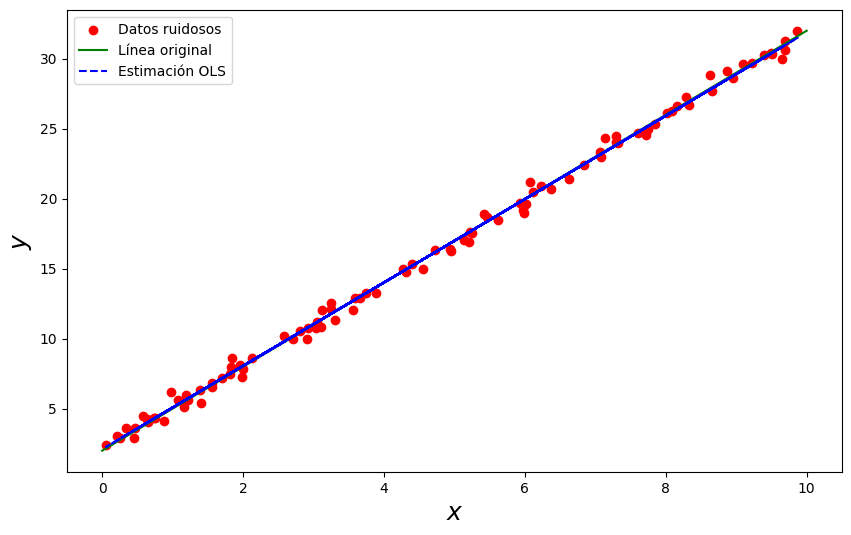

In [8]:
# Método para obtener X_train, X_test, y_train, y_test después de la selección
X=visualizer.X
y_noisy=visualizer.y_noisy
y_original=visualizer.y_original
theta0=visualizer.theta0
theta1=visualizer.theta1
#@title Modelo de regresión lineal
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Función para ajustar el modelo lineal de sklearn y graficar resultados
def plot_with_sklearn(X, y_noisy, y_original, theta0, theta1):
    # Crear una instancia del modelo lineal de sklearn
    model = LinearRegression()

    # Ajustar el modelo a los datos ruidosos
    model.fit(X, y_noisy)

    # Predecir los valores con el modelo ajustado
    y_pred = model.predict(X)

    plt.figure(figsize=(10, 6))
    # Graficar los puntos ruidosos
    plt.scatter(X, y_noisy, color='red', label='Datos ruidosos')

    # Graficar la línea recta original
    X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
    y_original_plot = theta1 * X_plot + theta0
    plt.plot(X_plot, y_original_plot, color='green', label='Línea original')

    # Graficar la línea estimada por el modelo
    plt.plot(X, y_pred, color='blue', linestyle='--', label='Estimación OLS')

    # Configuración de etiquetas y leyenda
    plt.xlabel("$x$", fontsize=18)
    plt.ylabel("$y$", fontsize=18)
    plt.legend()
    plt.show()

# Ajustar y graficar el modelo usando sklearn
plot_with_sklearn(X, y_noisy, y_original, theta0, theta1)


### **Observaciones sobre el modelo lineal**
- Si la entrada $X$ y la salida $Y$ son observaciones de variables aleatorias Gaussianas, la regresión de $Y$ sobre $X$ es **estrictamente una función lineal**.
  Es decir, el mapeo $\mathcal{N}_{X} \to f(.) \to \mathcal{N}_{Y}$ es únicamente lineal.

- Se puede demostrar que:
  
  $$
  \mathbb{E} \{ Y \mid X = x \} = m_{1Y} + \rho \sigma_Y \frac{x - m_{1X}}{\sigma_X},
  $$

  donde $\rho \in [-1, 1]$ es el coeficiente de correlación.

  - Si $\rho \to 0$, entonces $\mathbb{E} \{ Y \mid X = x \} \to m_{1Y}$, es decir, en promedio, el modelo de regresión no refleja una relación significativa entre $X$ y $Y$.
  - Si $\mid \rho \mid \to 1$, el valor esperado de $Y$ dado $X$ se aproxima a la relación lineal y, en promedio, el modelo de regresión **siempre** se cumple.

- En resumen, $\rho$ evalúa la calidad del ajuste del modelo de dependencia o la consistencia del regresor **lineal**.





### **Evaluación de modelos de regresión lineal**

- **Coeficiente de determinación** $R^2$ (*R-squared*): Es una generalización del coeficiente de correlación $\rho$ para múltiples predictores:

  $$
  R^2 = 1 - \frac{\sigma^2_{res}}{\sigma^2_y}
  $$

  El valor de $R^2$ representa el porcentaje de la variación en la variable dependiente que es explicada por los predictores independientes. Cuanto mayor sea el valor de $R^2$, mejor es el ajuste del modelo.

  **Desventaja**: El valor de $R^2$ tiende a aumentar al añadir más variables al modelo, incluso si estas no contribuyen significativamente. Por ello, es común usar el valor ajustado de $R^2$.

- **Errores de consistencia en validación**: Estas métricas miden el desajuste entre los valores predichos y los valores reales.

  - **Error Cuadrático Medio (MSE)**:
    
    $$
    MSE = \mathbb{E} \{ \| y - \tilde{y} \|_2^2 \}
    $$

  - **Error Absoluto Medio (MAE)**:
    
    $$
    MAE = \mathbb{E} \{ \| y - \tilde{y} \|_1 \}
    $$

  **Desventaja**: Tanto el MSE como el MAE pueden verse fuertemente afectados por valores atípicos, lo que puede distorsionar la evaluación del modelo.


### **Factores que influyen en la calidad de la estimación por OLS**

- **Suposiciones débiles sobre la normalidad** (gaussianidad) de las variables o relaciones que se alejan significativamente de los modelos lineales de interdependencia.

- **Dispersión (varianza)** en los valores observados para las variables aleatorias, lo que puede dificultar un ajuste preciso.

- **Presencia de valores atípicos** o anómalos, que pueden distorsionar las estimaciones de los coeficientes.

- En modelos **MISO** (Múltiples Entradas, Una Salida), la **colinealidad** o alta correlación entre los predictores puede hacer que la matriz de atributos se vuelva **singular** (no invertible), lo que impide realizar las estimaciones correctamente.

  Para evitar este problema, se evalúa el coeficiente de correlación ($\rho$) entre los distintos predictores. Los predictores cuya correlación supere un umbral predefinido (por ejemplo, $\mid \rho \mid > 0.9$) son descartados del modelo.

## **Restricciones sobre el modelo de regresión lineal**
- Alta dispersión de medida
- Presencia de valores atípicos


In [9]:
# @title
# Función para generar datos de una línea recta y añadir ruido, incluyendo outliers
def generate_data_with_outliers(n_points, theta0, theta1, sigma, n_outliers):
    np.random.seed(42)
    # Generar valores de X aleatorios entre 0 y 10
    X = 10 * np.random.rand(n_points, 1)

    # Generar la línea recta original
    y_original = theta1 * X + theta0

    # Añadir ruido a los datos
    noise = sigma * np.random.randn(n_points, 1)
    y_noisy = y_original + noise

    # Generar outliers (valores atípicos)
    if n_outliers > 0:
        X_outliers = 10 * np.random.rand(n_outliers, 1)
        y_outliers = theta1 * X_outliers + theta0 + 10 * np.random.randn(n_outliers, 1)  # Outliers lejanos
        # Combinar los valores normales con los atípicos
        X = np.vstack([X, X_outliers])
        y_noisy = np.vstack([y_noisy, y_outliers])
        y_original = np.vstack([y_original, theta1 * X_outliers + theta0])
    return X, y_noisy, y_original

# Clase para visualizar los datos generados y el ajuste de regresión
class LinearDataVisualizer:
    def __init__(self, theta0, theta1):
        self.theta0 = theta0
        self.theta1 = theta1
        self.X = None
        self.y_noisy = None
        self.y_original = None

    # Función para generar datos y plotear el ajuste de regresión, enfocándose en los outliers
    def plot_data(self, n_points, n_outliers, sigma):
        # Generar los datos con outliers
        self.X, self.y_noisy, self.y_original = generate_data_with_outliers(n_points, self.theta0, self.theta1, sigma, n_outliers)
        model = LinearRegression()
        # Ajustar el modelo a los datos ruidosos
        model.fit(self.X, self.y_noisy)
        y_pred = model.predict(self.X)
        # Calcular el error cuadrático medio (MSE) entre la línea original y los puntos con ruido
        mse = mean_squared_error(y_pred, self.y_original)
        # Graficar los puntos y la línea ajustada
        plt.figure(figsize=(10, 6))
        plt.scatter(self.X, self.y_noisy, color='r', s=10, label='Datos con ruido y atípicos')  # Datos con ruido y outliers
        plt.plot(self.X, self.y_original, 'b-', label=f'Línea original')  # Línea ajustada por el usuario
        plt.plot(self.X, y_pred, 'g--', label=f'Línea estimada (Error = {mse:.4f})')  # Línea ajustada por el usuario

        # Fijar los límites de los ejes
        plt.xlim(0, 10)
        plt.ylim(min(self.y_noisy) - 1, max(self.y_noisy) + 1)

        plt.xlabel("$x$", fontsize=14)
        plt.ylabel("$y$", fontsize=14)
        plt.title(f"Ajuste de la línea original con {n_outliers} valores atípicos")
        plt.legend()
        plt.grid(True)
        plt.show()

# Instanciar la clase
visualizer = LinearDataVisualizer(theta0=2, theta1=3)

# Añadir controles para que el usuario ajuste el número de muestras, el número de outliers y la varianza del ruido
interact(visualizer.plot_data,
         n_points=IntSlider(min=20, max=50, step=5, value=30, description='Muestras'),
         n_outliers=IntSlider(min=0, max=20, step=1, value=0, description='Valores atípicos'),
         sigma=FloatSlider(min=0.1, max=5.0, step=0.1, value=0.5, description='Ruido'));

interactive(children=(IntSlider(value=30, description='Muestras', max=50, min=20, step=5), IntSlider(value=0, …

### Tercer enfoque [Generalización a MISO]: *OLS para modelos de regresión Múltiple*


$
\qquad \pmb{y}=f(\pmb{\varTheta},\mathbf{X})= \sum_{i=0}^p\pmb{\theta}_iX_i + \theta_0 +\sigma\pmb{\epsilon},\quad X_0 =1 \\
\qquad \mathbf{X}\pmb{\theta}	 =\mathbf{y}
$

\begin{align*}
		\mathbf{X}=\begin{bmatrix}
			{x}_{11} & \ldots & {x}_{1M}\\
			\ldots &\ldots &\ldots \\
			{x}_{M'M} & \ldots & {x}_{ {M'M}}
		\end{bmatrix},\,
		\mathbf{y}= \begin{bmatrix}
			\mathbf{y}_{1} & \ldots & {y}_{M}
		\end{bmatrix}	,\, 	\mathbf{\theta}=
    \begin{bmatrix}
			\theta_{1} & \ldots & \theta_{M} 	,\,
		\end{bmatrix}
	\end{align*}

El modelo contiene $p$ indicadores con un único desplazamiento más ruido de medida con valor medio cero (No debe haber más aporte en la incertidumbre  del desplazamiento!).

**Suposiciones**:
- los valores de **error $\epsilon_m\in \pmb{\epsilon}$ son independientes** entre sí. El error de medida del costo de vivienda es independiente del error de medida en la distancia al centro de la ciudad.

- Filas $\pmb{x}_m$ **sin error de medida**. Esto es,  no hay un error caracter´sitico y propiio de cada que se agrega a  todos los valores de las variables que se miden)

- Los errores solo ocurren en la dirección vertical

- En OLS, la optimización por $\ell_2$  se realiza mediante la resolución conjunta de todos los modelos superpuestos linealmente --  sistema de ecuaciones lineales.  **Esto es la cantidad de filas debe ser igual a la de columnas**.

### **Restricciones sobre el modelo MÚLTIPLE de regresión lineal**

- Todas las del modelo simple

- cantidad de filas   igual a la de columnas. Hay que meter tantas filas como predictores hay.

- La matriz $  \mathbf{X}^{\top}\mathbf{X} $ es singular [**computacionalmente tratable**], solo si $M'= M$

  ⚡ **Ejemplo** ⚡: Dependencia del consumo de energía ($r=1$) de la distancia al centro de la ciudad, el costo de cada vivienda, la cantidad de pisos, metereología, consumo de agua,....,  edad de personas que la habitan, $s{=}3000$. **O sea, por cada cada predictor debo tener 3000 medidas!**
  
  ¿Qué tan posible es la medida de toda esa información?... Poco y tiende a menos en la medida en que $s$ crece, haciendo la recolección de datos muy costosa.
  
- En la práctica,  $M'\neq M$, de hecho es más común  $M> M'$ [matriz ancha]  que $M< M'$ [matriz larga].

  En caso de matrices anchas, $ \mathbf{X}^{\top}\mathbf{X} $ no es singular -- desbarata el algoritmo de manejo matricial.

  Solución: Aproximación de la matriz inversa mediante técnicas algebraicas y que está contemplada en todos los algoritmos de OLS. **El usuario nunca se entera de ese problema**

- *Colinealidad*: existe una alta correlación entre las variables independientes $\to $ **matriz mal condicionada** $\to$ disminuye la estabilidad numérica y aumenta los costos computacionales.

  *Solución*: Dividir el mundo en dos: varibles que tiene un comportamiento adecuado [*regular*] y las variables problema [*irregular*].
  
  Pero en modelos con cientos o miles de predictores, como hallar las variables colineales? Luego, se cuantificó la división de forma automática?

## **Métodos de Regularización**


"Divide y reinarás":

\\
Variables que tienen un comportamiento  [regular] y  variables con comportamiento [irregular]; ambas partes divididas por un lindero -- *parámetro de regularización*.

### Regularización por $\ell_2$ [Tíjonov, Ridge]

\begin{equation}
\min_{w} \|Xw - y\|^2_2 + \lambda \|w\|^2_2
\end{equation}

$
\min_{w} \|Xw - y\|^2_2
$ -- ponderación de variables regularizadas

$\|w\|$ -- ponderación de variables irregulares

$\lambda $ -- parámetro de regularización


Por lo tanto, los coeficientes   (de regularización) minimizan en términos de $\ell_2$ la suma ponderada [penalizada] de residuales.

El parámetro de regularización (complejidad) $\lambda$ controla la cantidad de reducción del número de predictores. Cuanto mayor sea el valor de $\lambda$, mayor será la cantidad de reducción, y por lo tanto, los coeficientes se vuelven más robustos a la colinealidad.

**¿Cómo encontrar un valor óptimo para $\lambda$?**

  Se utiliza una estrategia de validación cruzada. El $\lambda_{opt}$ es aquel que proporciona el menor error de predicción en la validación cruzada.

**Propiedades del Regularización por $\ell_2$ :**

- $\hat{\theta}_{ridge}$ es un estimador sesgado de $\theta$, pero tiene una baja varianza.
- Es mejor que el método de mínimos cuadrados cuando hay demasiados parámetros $\theta$.
- Ofrece una solución contra la multidimensionalidad cuando el número de variables es mayor que el número de observaciones.
- Problema: existe una alta correlación entre las variables independientes.


In [10]:
#@title Métricas de rendimiento
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, IntSlider, interact
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Función para generar datos de una línea recta y añadir ruido
def generate_data(n_points, theta0, theta1, sigma):
    # Generar valores de X aleatorios en un rango más amplio (0 a 10)
    X = 10 * np.random.rand(n_points, 1)

    # Generar la línea recta original
    y_original = theta1 * X + theta0

    # Añadir ruido a los datos
    noise = sigma * np.random.randn(n_points, 1)
    y_noisy = y_original + noise

    return X, y_original, y_noisy

# Clase para visualizar los datos generados
class LinearDataVisualizer:
    def __init__(self, theta0, theta1):
        self.theta0 = theta0
        self.theta1 = theta1
        self.X = None
        self.y_original = None

    # Función para generar datos y plotear la recta con diferentes niveles de ruido
    def plot_with_noise(self, sigma, n_points):
        # Generar los datos
        self.X, self.y_original, self.y_noisy = generate_data(n_points, self.theta0, self.theta1, sigma)

        # Calcular el error en función del ruido
        sigmas = np.linspace(0, sigma, 50)  # Rango de ruido desde 0 hasta sigma
        mse_errors = []
        mae_errors = []
        r2_scores = []

        for s in sigmas:
            _, y_original, y_noisy = generate_data(n_points, self.theta0, self.theta1, s)
            mse_errors.append(mean_squared_error(y_original, y_noisy))
            mae_errors.append(mean_absolute_error(y_original, y_noisy))
            r2_scores.append(r2_score(y_original, y_noisy))

        # Crear una figura con dos columnas
        fig, ax = plt.subplots(1, 2, figsize=(14, 6))

        # Gráfica de los datos con ruido en la izquierda
        ax[0].plot(self.X, self.y_original, 'g-', label='Línea original')  # Línea original sin ruido
        ax[0].scatter(self.X, self.y_noisy, color='r', s=10, label=f'Datos con ruido (σ = {sigma})')  # Datos con ruido
        ax[0].set_xlabel("$x$", fontsize=12)
        ax[0].set_ylabel("$y$", fontsize=12)
        ax[0].set_title(f"Datos con ruido (σ = {sigma})")
        ax[0].legend()

        # Gráfica del MSE, MAE y R2 en función del nivel de ruido en la derecha
        ax[1].plot(sigmas, mse_errors, 'b-', label='MSE vs. Ruido')
        ax[1].plot(sigmas, mae_errors, 'r-', label='MAE vs. Ruido')
        ax[1].plot(sigmas, r2_scores, 'g-', label='R2 vs. Ruido')
        ax[1].set_xlabel("Nivel de ruido (σ)", fontsize=12)
        ax[1].set_ylabel("Error y R2", fontsize=12)
        ax[1].set_yscale('log')  # Escala logarítmica en el eje x
        ax[1].set_title("MSE, MAE y R2 en función del nivel de ruido")
        ax[1].legend()

        plt.tight_layout()
        plt.show()

# Instanciar la clase con la recta original fija
visualizer = LinearDataVisualizer(theta0=2, theta1=3)

# Añadir controles para que el usuario ajuste el nivel de ruido y la cantidad de puntos
interact(visualizer.plot_with_noise,
         sigma=FloatSlider(min=0, max=20, step=0.01, value=0.5, description='Ruido (σ)'),
         n_points=IntSlider(min=50, max=200, step=10, value=100, description='Muestras'));


interactive(children=(FloatSlider(value=0.5, description='Ruido (σ)', max=20.0, step=0.01), IntSlider(value=10…

In [11]:
# ID del archivo de Google Drive
FILEID = "12eIZ3bkgQ_tC8JWiUwgaQ-jfY2mdjhno"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O meatspec.csv && rm -rf /tmp/cookies.txt
!dir


--2024-10-10 02:48:42--  https://docs.google.com/uc?export=download&confirm=&id=12eIZ3bkgQ_tC8JWiUwgaQ-jfY2mdjhno
Resolving docs.google.com (docs.google.com)... 142.251.183.100, 142.251.183.138, 142.251.183.101, ...
Connecting to docs.google.com (docs.google.com)|142.251.183.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=12eIZ3bkgQ_tC8JWiUwgaQ-jfY2mdjhno&export=download [following]
--2024-10-10 02:48:42--  https://drive.usercontent.google.com/download?id=12eIZ3bkgQ_tC8JWiUwgaQ-jfY2mdjhno&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.125.132, 2607:f8b0:4001:c2f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.125.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 171132 (167K) [application/octet-stream]
Saving to: ‘meatspec.csv’

meatspec.csv        100%[===================>] 167.12K  -

In [13]:
#@title Base de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, Dropdown

# Leer el archivo CSV
datos = pd.read_csv('meatspec.csv')
datos = datos.drop(columns=datos.columns[0])  # Eliminar columnas que no son de interés

# Función para explorar los datos
def explore_data(info_type):
    if info_type == 'Encabezado':
        display(datos.head())
    elif info_type == 'Descripción':
        display(datos.describe())
    elif info_type == 'Dimensiones':
        print(f'Dimensiones: {datos.shape}')
    elif info_type == 'Correlación':
        corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
        display(tidy_corr_matrix(corr_matrix).head(9))
    elif info_type == 'Heatmap':
        plot_heatmap()
    elif info_type == 'Distribución de Atributos':
        plot_pair_grid()
    else:
        print("Opción no válida.")

# Función para crear scatterplots
def better_scatter(x, y, **kwargs):
    plt.scatter(x, y, **kwargs)
    margin = (max(y) - min(y)) * 0.1
    plt.ylim(min(y) - margin, max(y) + margin)

# Función para mostrar el PairGrid
def plot_pair_grid():
    df = datos[['V2', 'V5', 'V10', 'V20', 'V50', 'V100']].dropna()
    g = sns.PairGrid(df, diag_sharey=False, corner=True)
    g.map_diag(plt.hist)
    g.map_offdiag(better_scatter)
    plt.show()

# Función para organizar la matriz de correlación
def tidy_corr_matrix(corr_mat):
    '''
    Organiza la matriz de correlación en formato ordenado para facilitar la visualización.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1', 'variable_2', 'r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    return corr_mat

# Función para graficar el heatmap de la matriz de correlación
def plot_heatmap():
    corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
    fig, ax = plt.subplots(figsize=(11.7, 8.27))
    sns.heatmap(corr_matrix, cmap="RdBu", square=True, ax=ax)
    ax.tick_params(labelsize=8)
    plt.show()

# Menú interactivo para explorar los datos
interact(explore_data,
         info_type=Dropdown(options=['Encabezado', 'Descripción', 'Dimensiones', 'Correlación', 'Heatmap', 'Distribución de Atributos'],
                            value='Encabezado', description='Datos:'));


interactive(children=(Dropdown(description='Datos:', options=('Encabezado', 'Descripción', 'Dimensiones', 'Cor…

In [14]:
#@title Particionado de datos
import pandas as pd
from ipywidgets import interact, Dropdown, FloatSlider
from sklearn.model_selection import train_test_split
from IPython.display import display

# Cargar los datos de meatspec y eliminar las columnas no numéricas
datos = pd.read_csv('meatspec.csv')
datos = datos.drop(columns=datos.columns[0])  # Eliminar la primera columna no numérica (si es el caso)

# Clase para manejar la selección de la variable objetivo y la partición
class TargetSelectionVisualizer:
    def __init__(self, data):
        self.data = data  # Guardar el DataFrame original
        self.X = None  # Variables independientes
        self.y = None  # Variable dependiente
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    # Método para dividir en X e y basándose en la selección del usuario
    def select_target(self, target_col, test_size):
        # Definir la variable dependiente (target)
        self.y = self.data[target_col]
        # Definir las variables independientes (todas las demás columnas)
        self.X = self.data.drop(columns=[target_col])

        # Realizar la partición en entrenamiento y prueba
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=test_size, random_state=42)

        print(f"Variable objetivo seleccionada: {target_col}")
        print(f"Proporción de prueba seleccionada: {test_size*100:.1f}%")

        print("\nPrimeras 5 filas de las variables independientes en X_train:\n")
        display(self.X_train.head())  # Mostrar las primeras 5 filas de X_train
        print("\nPrimeras 5 filas de la variable dependiente en y_train:\n")
        display(self.y_train.head())  # Mostrar las primeras 5 filas de y_train

    # Método para devolver X_train, X_test, y_train, y_test
    def get_train_test_data(self):
        return self.X_train, self.X_test, self.y_train, self.y_test

# Inicializar la clase con el DataFrame cargado (datos)
visualizer = TargetSelectionVisualizer(datos)

# Crear la función interactiva para seleccionar la variable objetivo y la partición
def interactive_target_selection(target_col, test_size):
    visualizer.select_target(target_col, test_size)

# Hacer interactiva la selección de la variable objetivo y el tamaño del test set
interact(interactive_target_selection,
         target_col=Dropdown(options=datos.columns, description='Variable Objetivo:'),
         test_size=FloatSlider(min=0.1, max=0.5, step=0.05, value=0.3, description='Tamaño Test'));


interactive(children=(Dropdown(description='Variable Objetivo:', options=('V2', 'V3', 'V4', 'V5', 'V6', 'V7', …

In [15]:
# Obtener las particiones
X_train, X_test, y_train, y_test = visualizer.get_train_test_data()

In [16]:
#@title Regresión Ridge
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, LinearRegression
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact, Dropdown, FloatLogSlider
from sklearn.model_selection import train_test_split

# Datos sintéticos para el ejemplo

# Función para graficar la importancia de las variables
def plot_variable_importance():
    # Escalar las características
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Construir y entrenar el modelo Lineal
    modelo_lineal = LinearRegression()
    modelo_lineal.fit(X_train_scaled, y_train)

    # Construir y entrenar el modelo Ridge
    modelo_ridge = RidgeCV(alphas=np.logspace(-10, 2, 200), fit_intercept=True)
    modelo_ridge.fit(X_train_scaled, y_train)

    # Coeficientes del modelo lineal
    df_coef_lineal = pd.DataFrame({
        'predictor': X_train.columns,
        'coef': modelo_lineal.coef_.flatten()
    })

    # Coeficientes del modelo Ridge
    df_coef_ridge = pd.DataFrame({
        'predictor': X_train.columns,
        'coef': modelo_ridge.coef_.flatten()
    })

    # Graficar los coeficientes
    fig, axs = plt.subplots(1, 2, figsize=(14, 10))

    # Coeficientes del modelo lineal
    axs[0].stem(df_coef_lineal['predictor'], df_coef_lineal['coef'], markerfmt=' ')
    axs[0].set_title("Coeficientes del Modelo Lineal")
    axs[0].set_xlabel("Predictores")
    axs[0].set_ylabel("Coeficientes (θ)")
    axs[0].tick_params(axis='x', rotation=90, labelsize=8)

    # Coeficientes del modelo Ridge
    axs[1].stem(df_coef_ridge['predictor'], df_coef_ridge['coef'], markerfmt=' ')
    axs[1].set_title("Coeficientes del Modelo Ridge")
    axs[1].set_xlabel("Predictores")
    axs[1].set_ylabel("Coeficientes (θ)")
    axs[1].tick_params(axis='x', rotation=90, labelsize=5)

    plt.tight_layout()
    plt.show()

# Función para graficar la evolución de los coeficientes en función de alpha (λ)
def plot_alpha_evolution(max_alpha):
    # Escalar las características
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    alphas = np.logspace(-9, np.log10(max_alpha), 200)
    coefs = []

    # Ajustar el modelo Ridge para cada alpha
    for alpha in alphas:
        ridge = Ridge(alpha=alpha, fit_intercept=False)
        ridge.fit(X_train_scaled, y_train)
        coefs.append(ridge.coef_.flatten())

    # Graficar la evolución de los coeficientes
    fig, ax = plt.subplots(figsize=(11.7, 8.27))
    ax.plot(alphas, coefs)
    ax.set_xscale('log')
    ax.set_xlabel('Alpha (λ)')
    ax.set_ylabel('Coeficientes (θ)')
    ax.set_title('Coeficientes del Modelo según el valor de regularización, λ')
    plt.tight_layout()
    plt.show()

# Función principal para controlar las opciones del usuario
def interactive_model_analysis(choice, max_alpha):
    if choice == 'Importancia de las Variables':
        plot_variable_importance()
    elif choice == 'Evolución de los Coeficientes con λ':
        plot_alpha_evolution(max_alpha)

# Interfaz interactiva para que el usuario elija la visualización
interact(
    interactive_model_analysis,
    choice=Dropdown(options=['Importancia de las Variables', 'Evolución de los Coeficientes con λ'],
                    value='Importancia de las Variables', description='Visualización:'),
    max_alpha=FloatLogSlider(value=1e-6, base=10, min=-9, max=2, step=0.1, description='Alpha Máx (λ)')
);


interactive(children=(Dropdown(description='Visualización:', options=('Importancia de las Variables', 'Evoluci…

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


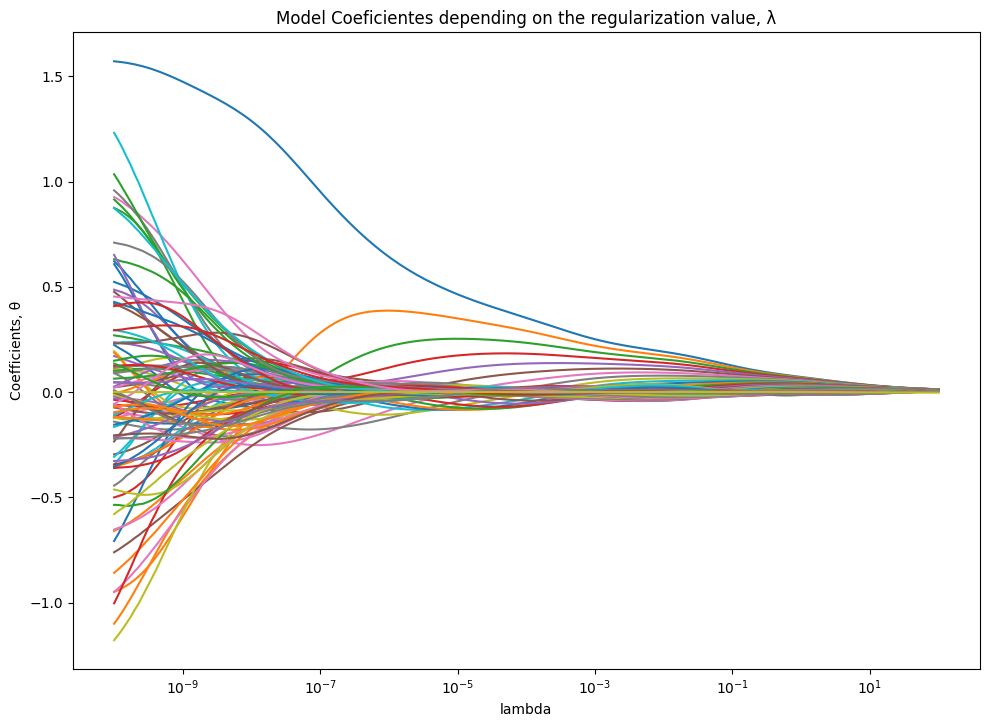

In [17]:
from sklearn.linear_model import RidgeCV
modelo = RidgeCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            store_cv_values = True
         )

_ = modelo.fit(X = X_train, y = y_train)

# Evolution of coeficients depending on alpha
# ==============================================================================
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(11.7,8.27))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('lambda')
ax.set_ylabel('Coefficients, θ')
ax.set_title('Model Coeficientes depending on the regularization value, λ');
plt.axis('tight')
plt.show()


### * Regularización por $\ell_1$ [Lasso]

\begin{equation}
\min_{w}   \|Xw - y\|^2_2 + \alpha \|w\|_1
\end{equation}

En la regresión Lasso, los coeficientes se ajustan para minimizar una suma de residuos penalizada, pero con una penalización basada en la norma L1 (en lugar de la norma L2 de Ridge). Esta penalización provoca que algunos coeficientes se reduzcan a exactamente cero, lo que hace que Lasso sea útil para la selección de variables.

El parámetro de regularización $\lambda$ controla la cantidad de penalización. A mayor valor de $\lambda$, más coeficientes se reducen a cero, y el modelo se vuelve más sencillo.

**¿Cómo encontrar un valor óptimo para $\lambda$?** Se utiliza una estrategia de validación cruzada. El $\lambda_{opt}$ es el que minimiza el error de predicción en la validación cruzada.

**Propiedades de Regularización por $\ell_1$:**

- $\hat{\theta}_{lasso}$ es un estimador sesgado de $\theta$, pero es útil para la selección de variables.
- Algunos coeficientes pueden ser reducidos a exactamente cero, lo que simplifica el modelo.
- Es útil cuando hay muchas variables predictoras y se espera que solo unas pocas sean relevantes.
- Problema: puede ser inestable cuando las variables predictoras están altamente correlacionadas entre sí.




In [18]:
#@title Regresión Lasso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact, Dropdown, FloatLogSlider
from sklearn.model_selection import train_test_split
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
# Función para graficar la importancia de las variables en los modelos Lineal y Lasso
def plot_variable_importance():
    # Escalar las características
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Construir y entrenar el modelo Lineal
    modelo_lineal = LinearRegression()
    modelo_lineal.fit(X_train_scaled, y_train)

    # Construir y entrenar el modelo Lasso
    modelo_lasso = LassoCV(alphas=np.logspace(-10, 3, 200), cv=10)
    modelo_lasso.fit(X_train_scaled, y_train)

    # Coeficientes del modelo lineal
    df_coef_lineal = pd.DataFrame({
        'predictor': X_train.columns,
        'coef': modelo_lineal.coef_.flatten()
    })

    # Coeficientes del modelo Lasso
    df_coef_lasso = pd.DataFrame({
        'predictor': X_train.columns,
        'coef': modelo_lasso.coef_.flatten()
    })

    # Graficar los coeficientes
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Coeficientes del modelo lineal
    axs[0].stem(df_coef_lineal['predictor'], df_coef_lineal['coef'], markerfmt=' ')
    axs[0].set_title("Coeficientes del Modelo Lineal")
    axs[0].set_xlabel("Predictores")
    axs[0].set_ylabel("Coeficientes (θ)")
    axs[0].tick_params(axis='x', rotation=90, labelsize=8)

    # Coeficientes del modelo Lasso
    axs[1].stem(df_coef_lasso['predictor'], df_coef_lasso['coef'], markerfmt=' ')
    axs[1].set_title("Coeficientes del Modelo Lasso")
    axs[1].set_xlabel("Predictores")
    axs[1].set_ylabel("Coeficientes (θ)")
    axs[1].tick_params(axis='x', rotation=90, labelsize=8)

    plt.tight_layout()
    plt.show()

# Función para graficar la evolución de los coeficientes en función de alpha (λ)
def plot_alpha_evolution(max_alpha):
    # Escalar las características
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    alphas = np.logspace(-10, np.log10(max_alpha), 200)
    coefs = []

    # Ajustar el modelo Lasso para cada alpha
    for alpha in alphas:
        lasso = Lasso(alpha=alpha, fit_intercept=False)
        lasso.fit(X_train_scaled, y_train)
        coefs.append(lasso.coef_.flatten())

    # Graficar la evolución de los coeficientes
    fig, ax = plt.subplots(figsize=(11.7, 8.27))
    ax.plot(alphas, coefs)
    ax.set_xscale('log')
    ax.set_xlabel('Alpha (λ)')
    ax.set_ylabel('Coeficientes (θ)')
    ax.set_title('Coeficientes del Modelo según el valor de regularización, λ')
    plt.tight_layout()
    plt.show()

# Función principal para controlar las opciones del usuario
def interactive_model_analysis(choice, max_alpha):
    if choice == 'Importancia de las Variables':
        plot_variable_importance()
    elif choice == 'Evolución de los Coeficientes con λ':
        plot_alpha_evolution(max_alpha)

# Interfaz interactiva para que el usuario elija la visualización
interact(
    interactive_model_analysis,
    choice=Dropdown(options=['Importancia de las Variables', 'Evolución de los Coeficientes con λ'],
                    value='Importancia de las Variables', description='Visualización:'),
    max_alpha=FloatLogSlider(value=1e-6, base=10, min=-10, max=3, step=0.1, description='Alpha Máx (λ)')
);


interactive(children=(Dropdown(description='Visualización:', options=('Importancia de las Variables', 'Evoluci…

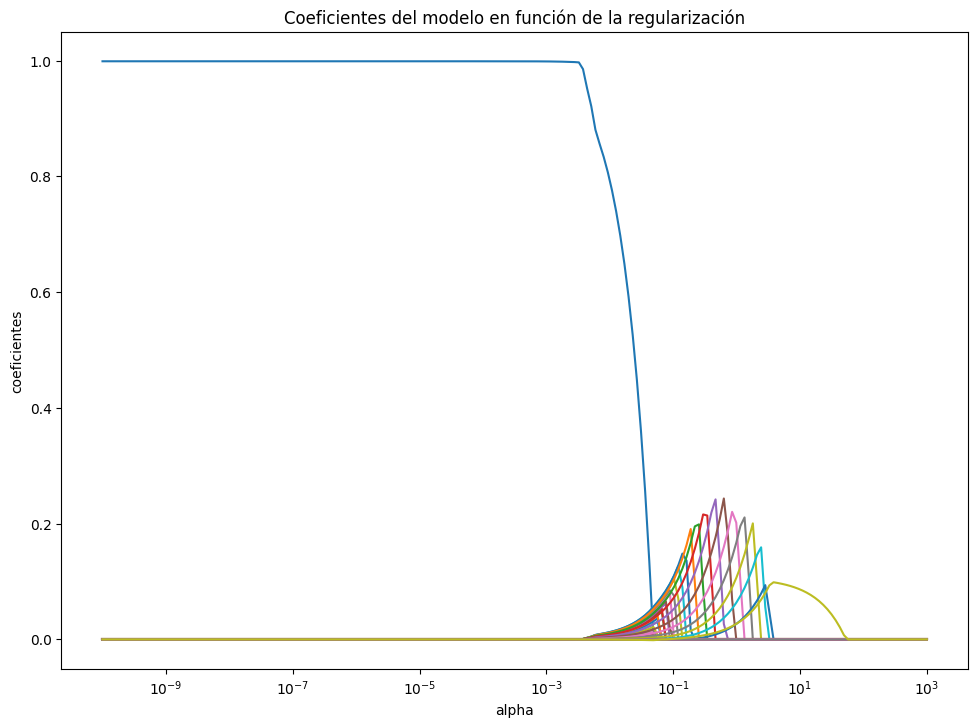

In [19]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto LassoCV utiliza el mean squared error
modelo = LassoCV(
            alphas          = np.logspace(-10, 3, 200),
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train)
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(11.7,8.27))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');


### Regularización por $\ell_{2,1}$ [ElasticNet]

\begin{equation}
\min_{w}   \|Xw - y\|^2_2 + \alpha \rho \|w\|_1 + \frac{\alpha (1 - \rho)}{2} \|w\|^2_2
\end{equation}

La regresión ElasticNet combina las propiedades de la regresión Ridge y Lasso, utilizando tanto una penalización basada en la norma L1 (como en Lasso) como en la norma L2 (como en Ridge). Esto permite obtener los beneficios de ambas regularizaciones: la selección de variables de Lasso y la estabilidad de Ridge en situaciones donde las variables predictoras están correlacionadas.

El parámetro de regularización $\lambda$ controla la magnitud de la penalización, mientras que otro parámetro $\alpha$ determina la combinación entre las penalizaciones L1 y L2. Con $\alpha = 1$, ElasticNet se comporta como Lasso, y con $\alpha = 0$, se comporta como Ridge.

**¿Cómo encontrar valores óptimos para $\lambda$ y $\alpha$?** Se utiliza una estrategia de validación cruzada para encontrar el par de valores $(\lambda_{opt}, \alpha_{opt})$ que minimicen el error de predicción en el conjunto de validación cruzada.

**Propiedades de Regularización por $\ell_{2,1}$:**

- ElasticNet es útil cuando hay muchas variables predictoras y existe una alta correlación entre ellas.
- Combina la capacidad de selección de variables de Lasso con la estabilidad de Ridge.
- Puede seleccionar grupos de variables correlacionadas, manteniendo todas aquellas que están relacionadas.
- Problema: puede requerir más ajuste de hiperparámetros que Lasso o Ridge debido a la necesidad de optimizar tanto $\lambda$ como $\alpha$.



In [20]:
#@title Regresión ElasticNet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet, ElasticNetCV, LinearRegression
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact, Dropdown, FloatLogSlider, FloatSlider
from sklearn.model_selection import train_test_split

# Función para graficar la importancia de las variables en el modelo Lineal y ElasticNet
def plot_variable_importance():
    # Escalar las características
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Construir y entrenar el modelo Lineal
    modelo_lineal = LinearRegression()
    modelo_lineal.fit(X_train_scaled, y_train)

    # Construir y entrenar el modelo ElasticNet
    modelo_elasticnet = ElasticNetCV(l1_ratio=[0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
                                     alphas=np.logspace(-10, 3, 100), cv=5)
    modelo_elasticnet.fit(X_train_scaled, y_train)

    # Coeficientes del modelo lineal
    df_coef_lineal = pd.DataFrame({
        'predictor': X_train.columns,
        'coef': modelo_lineal.coef_.flatten()
    })

    # Coeficientes del modelo ElasticNet
    df_coef_elasticnet = pd.DataFrame({
        'predictor': X_train.columns,
        'coef': modelo_elasticnet.coef_.flatten()
    })

    # Graficar los coeficientes
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Coeficientes del modelo lineal
    axs[0].stem(df_coef_lineal['predictor'], df_coef_lineal['coef'], markerfmt=' ')
    axs[0].set_title("Coeficientes del Modelo Lineal")
    axs[0].set_xlabel("Predictores")
    axs[0].set_ylabel("Coeficientes (θ)")
    axs[0].tick_params(axis='x', rotation=90, labelsize=8)

    # Coeficientes del modelo ElasticNet
    axs[1].stem(df_coef_elasticnet['predictor'], df_coef_elasticnet['coef'], markerfmt=' ')
    axs[1].set_title("Coeficientes del Modelo ElasticNet")
    axs[1].set_xlabel("Predictores")
    axs[1].set_ylabel("Coeficientes (θ)")
    axs[1].tick_params(axis='x', rotation=90, labelsize=8)

    plt.tight_layout()
    plt.show()

# Función para graficar la evolución de los coeficientes en función de alpha (λ) y l1_ratio
def plot_alpha_l1_evolution(max_alpha, l1_ratio):
    # Escalar las características
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    alphas = np.logspace(-10, np.log10(max_alpha), 100)
    coefs = []

    # Ajustar el modelo ElasticNet para cada alpha
    for alpha in alphas:
        elasticnet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=False)
        elasticnet.fit(X_train_scaled, y_train)
        coefs.append(elasticnet.coef_.flatten())

    # Graficar la evolución de los coeficientes
    fig, ax = plt.subplots(figsize=(11.7, 8.27))
    ax.plot(alphas, coefs)
    ax.set_xscale('log')
    ax.set_xlabel('Alpha (λ)')
    ax.set_ylabel('Coeficientes (θ)')
    ax.set_title(f'Evolución de Coeficientes con ElasticNet, l1_ratio = {l1_ratio}')
    plt.tight_layout()
    plt.show()

# Función principal para controlar las opciones del usuario
def interactive_model_analysis(choice, max_alpha, l1_ratio):
    if choice == 'Importancia de las Variables':
        plot_variable_importance()
    elif choice == 'Evolución de los Coeficientes con λ y l1_ratio':
        plot_alpha_l1_evolution(max_alpha, l1_ratio)

# Interfaz interactiva para que el usuario elija la visualización y ajuste de parámetros
interact(
    interactive_model_analysis,
    choice=Dropdown(options=['Importancia de las Variables', 'Evolución de los Coeficientes con λ y l1_ratio'],
                    value='Importancia de las Variables', description='Visualización:'),
    max_alpha=FloatLogSlider(value=1, base=10, min=-10, max=3, step=0.1, description='Alpha Máx (λ)'),
    l1_ratio=FloatSlider(value=0.5, min=0, max=1, step=0.01, description='l1_ratio')
);


interactive(children=(Dropdown(description='Visualización:', options=('Importancia de las Variables', 'Evoluci…


¡Ahora exploremos un caso donde los datos **no son lineales**! En muchas situaciones del mundo real, los datos no siempre siguen una simple línea recta. Por eso, vamos a simular un ejemplo basado en una función no lineal como **sinc(x)**, que describe una relación más compleja entre $x $ y $ y $.

Matemáticamente, vamos a trabajar con:

$
y = \text{sinc}(x) + \eta
$

donde $\eta $ representa el **ruido blanco gaussiano**, que agrega pequeñas variaciones aleatorias a nuestra función, simulando imprecisiones que podemos encontrar en datos reales. Este ruido sigue una distribución normal con media $ \mu_{\eta} = 0 $ y varianza $ \sigma_{\eta}^2 $, lo que significa que no afecta sistemáticamente la relación entre $ x $ y $ y $, pero sí introduce algo de incertidumbre.




In [21]:
#@title Generación de datos partición
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, IntSlider, interact
from sklearn.model_selection import train_test_split

# Clase para visualizar los datos sinc generados con partición
class SincDataVisualizer:
    def __init__(self, N, var):
        self.N = N
        self.var = var
        self.X = None
        self.y_original = None
        self.y_noisy = None

    # Función para generar los datos sinc y añadir ruido
    def generate_sinc_data(self, N, var):
        X = np.linspace(-3*np.pi, 3*np.pi, N)  # vector de entrada
        y_original = np.sinc(X/np.pi)  # función sinc como objetivo
        noise = np.sqrt(var) * np.random.randn(X.shape[0])  # ruido blanco
        y_noisy = y_original + noise  # señal con ruido
        return X, y_original, y_noisy

    # Función para actualizar los parámetros y graficar datos con partición
    def plot_sinc_data(self, var, test_size):
        self.var = var

        # Generar nuevos datos con los parámetros actualizados
        self.X, self.y_original, self.y_noisy = self.generate_sinc_data(self.N, self.var)

        # Particionar los datos en entrenamiento y prueba
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X.reshape(-1,1), self.y_noisy.reshape(-1,1), test_size=test_size)

        # Graficar
        plt.figure(figsize=(8, 4))
        plt.plot(self.X, self.y_original, 'r-', label='Target (sinc)')  # Línea target sinc
        plt.scatter(self.X_train, self.y_train, color='r', s=10, label='Datos de entrenamiento')  # Datos de entrenamiento
        plt.scatter(self.X_test, self.y_test, color='b', s=10, label='Datos de prueba')  # Datos de prueba
        plt.xlabel("$x$", fontsize=14)
        plt.ylabel("$y$", fontsize=14)
        plt.title(f"Datos sinc con ruido (Varianza = {var}), Partición: {test_size*100:.1f}% Test")
        plt.legend()
        plt.show()

# Instanciar la clase
visualizer = SincDataVisualizer(N=500, var=0.1)

# Uso de interact con la instancia del visualizador para modificar la varianza y el tamaño de test
interact(visualizer.plot_sinc_data,
         var=FloatSlider(min=0.01, max=0.5, step=0.01, value=0.1, description='Varianza del Ruido'),
         test_size=FloatSlider(min=0.1, max=0.9, step=0.1, value=0.3, description='Test Size'));



interactive(children=(FloatSlider(value=0.1, description='Varianza del Ruido', max=0.5, min=0.01, step=0.01), …

In [22]:
# Método para obtener X_train, X_test, y_train, y_test después de la selección
X_train=visualizer.X_train
y_train=visualizer.y_train
X_test=visualizer.X_test
y_test=visualizer.y_test

**Ejercicio:** ¡Bien!, ahora que tenemos nuestros datos no lineales con ruido, intentemos algo interesante: ajustar un modelo lineal a estos datos.

Veamos qué sucede cuando tratamos de usar un modelo lineal. Aunque este tipo de modelo es más simple y directo, no siempre es la mejor opción para capturar relaciones complejas entre las variables. En este caso, nuestro reto será ver **cuán bien o mal** un modelo lineal puede ajustarse a nuestros datos no lineales.

¡Probemos a ajustar este modelo y analicemos los resultados! ¿Lograremos una buena aproximación o veremos que el modelo lineal es insuficiente para este tipo de relación?


In [23]:
#@title Modelos Lineales: Linear, Lasso, Ridge, ElasticNet
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from ipywidgets import FloatSlider, Dropdown, interact

# Función interactiva para ajustar diferentes modelos lineales
def plot_linear_models(model_type, alpha=1.0, l1_ratio=0.5):
    # Definir y entrenar el modelo basado en la elección del usuario
    if model_type == 'Linear Regression':
        model = LinearRegression()
    elif model_type == 'Lasso':
        model = Lasso(alpha=alpha)
    elif model_type == 'Ridge':
        model = Ridge(alpha=alpha)
    elif model_type == 'ElasticNet':
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Predecir valores en el conjunto de prueba
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    # Graficar los resultados
    plt.figure(figsize=(8, 4))
    plt.plot(X_test, y_test, 'r.', label='Datos reales (Test)')
    plt.plot(X_test, y_test_pred, 'k.', label='Predicción (Test)')
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y=f(x)', fontsize=14)
    plt.title(f'{model_type} (alpha={alpha:.3f}, l1_ratio={l1_ratio:.3f})')
    plt.legend()
    plt.show()

# Uso de interact para modificar el modelo, alpha y l1_ratio
interact(plot_linear_models,
         model_type=Dropdown(options=['Linear Regression', 'Lasso', 'Ridge', 'ElasticNet'],
                             value='Linear Regression', description='Modelo'),
         alpha=FloatSlider(min=0.001, max=10.0, step=0.01, value=1.0, description='Alpha'),
         l1_ratio=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.5, description='L1 Ratio'));


interactive(children=(Dropdown(description='Modelo', options=('Linear Regression', 'Lasso', 'Ridge', 'ElasticN…


**Regresión No Lineal**

- **Aproximación Lineal:**

Problema: El modelo aprendido no será capaz de manejar la relación no lineal entre los datos y el objetivo, ya que los modelos lineales asumen que la relación entre los datos y el objetivo es lineal.

- **Modelos intrínsecamente lineales:** Usando una transformación adecuada, pueden ser transformados en modelos de regresión lineal, por ejemplo, utilizando la transformación $\ln(x)$:

$
y = b \exp(ax) : \ln y = \ln b + ax
$

$
\sim y' = ax + b'; x > 0
$

$
y = \sum_{\forall n} a_n x^n : \ln \left( \sum_{\forall n} a_n x^n \right) = \sum_{\forall n} \ln(a_n) + \ln(x) \sum_{\forall n} n,
$

$
\sim \sum_{\forall n} a_n + \text{antilog} \left( \sum_{\forall n} n \right) \ln(x), N \leq 3
$

$
\sim 148 \ln(x) + \sum_{\forall n} a_n + \text{abs}(\min(y)), N = 3,
$

Problema: Ajustar correctamente las escalas de proyección es un desafío. **¿Cómo determinar si un modelo cumple con los supuestos impuestos?**



In [24]:
#@title Modelos no Lineales
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, Dropdown
# Generar datos exponenciales (y = b * exp(ax))
def generate_exponential_data(a, b, n_points, noise_std):
    np.random.seed(42)
    x = np.linspace(1, 10, n_points)  # valores de x > 0 para permitir logaritmos
    y = b * np.exp(a * x) + noise_std * np.random.randn(n_points)  # Ruido agregado
    return x, y
# Transformar los datos no lineales a un modelo lineal usando logaritmos
def transform_data(x, y, transform_type):
    if transform_type == 'Logaritmo natural (ln)':
        return x, np.log(y)
    else:
        return x, y  # No aplicar transformación
# Ajuste de regresión lineal
def linear_regression(x, y):
    A = np.vstack([x, np.ones(len(x))]).T
    slope, intercept = np.linalg.lstsq(A, y, rcond=None)[0]
    return slope, intercept

# Visualización interactiva
def plot_regression(a, b, n_points, noise_std, transform_type):
    # Generar datos exponenciales
    x, y = generate_exponential_data(a, b, n_points, noise_std)

    # Transformar los datos
    x_transformed, y_transformed = transform_data(x, y, transform_type)

    # Ajuste de regresión lineal
    slope, intercept = linear_regression(x_transformed, y_transformed)

    # Crear el modelo ajustado
    y_fit = slope * x_transformed + intercept

    # Gráfica de los datos originales y el ajuste
    plt.figure(figsize=(12, 6))

    # Subplot de los datos originales
    plt.subplot(1, 2, 1)
    plt.scatter(x, y, color='blue', label='Datos originales')
    plt.title("Datos Exponenciales Originales")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()

    # Subplot de los datos transformados y el ajuste lineal
    plt.subplot(1, 2, 2)
    plt.scatter(x_transformed, y_transformed, color='green', label=f'Datos transformados ({transform_type})')
    plt.plot(x_transformed, y_fit, color='red', label='Ajuste lineal')
    plt.title("Regresión Lineal con Transformación")
    plt.xlabel(f"x ({transform_type})")
    plt.ylabel(f"y ({transform_type})")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Desplegar la interfaz interactiva
interact(
    plot_regression,
    a=FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description='a (pendiente original)'),
    b=FloatSlider(min=1.0, max=5.0, step=0.1, value=1.0, description='b (intercepto original)'),
    n_points=IntSlider(min=20, max=100, step=10, value=50, description='Número de puntos'),
    noise_std=FloatSlider(min=0.0, max=1.0, step=0.1, value=0.1, description='Desviación estándar del ruido'),
    transform_type=Dropdown(options=['Sin transformación', 'Logaritmo natural (ln)'], value='Sin transformación', description='Transformación')
)


interactive(children=(FloatSlider(value=1.0, description='a (pendiente original)', max=2.0, min=0.1), FloatSli…

<function __main__.plot_regression(a, b, n_points, noise_std, transform_type)>

**Kernel Polinomial**

El kernel polinomial proyecta los datos en un espacio de mayor dimensionalidad, permitiendo que un modelo de regresión lineal se aplique de manera más efectiva en problemas donde la relación entre las variables de entrada y la salida es no lineal. Al igual que otros kernels, este método utiliza el **truco del kernel**, lo que evita la necesidad de calcular explícitamente las características en el espacio transformado.

El **parámetro de grado** determina el orden del polinomio utilizado en el kernel. En este caso, un kernel polinomial de grado 2 toma el producto punto de las características y lo eleva al cuadrado, permitiendo modelar relaciones cuadráticas entre las variables de entrada.

**Definición del Kernel Polinomial:**

Para un kernel polinomial de grado 2, la función kernel \( K(x, x') \) se define como:

$
K(x, x') = (\langle x, x' \rangle + 1)^2
$

Donde:
- $ \langle x, x' \rangle $ representa el producto punto entre los vectores de entrada $x $ y $ x' $.
- El término $ +1 $ es un sesgo que se añade para permitir la flexibilidad del modelo.

**Mapeo de características:**

El mapeo de características $ \phi(x) $ proyecta un vector de entrada bidimensional $ x = (x_1, x_2) $ en un espacio de mayor dimensionalidad de la siguiente manera:

$
\phi(x) = \left( 1, \sqrt{2}x_1, \sqrt{2}x_2, \sqrt{2}x_1x_2, x_1^2, x_2^2 \right)
$

**Propiedades del Kernel Polinomial:**

- El término $ 1 $ permite incluir un término de sesgo en el espacio transformado, facilitando el ajuste del modelo.
- Los términos $ \sqrt{2}x_1 $ y $ \sqrt{2}x_2 $ representan las características originales escaladas por $ \sqrt{2} $.
- El término $ \sqrt{2}x_1x_2 $ refleja la interacción entre las dos características de entrada.
- Los términos $ x_1^2 $ y $ x_2^2 $ capturan la relación cuadrática entre las variables.

**Ventajas del Kernel Polinomial en Regresión:**

- Permite ajustar modelos de regresión en espacios no lineales sin necesidad de calcular explícitamente las características transformadas, gracias al truco del kernel.
- Es útil cuando la relación entre las variables predictoras y la variable objetivo es polinomial o tiene interacciones complejas.
- Problema: A medida que aumenta el grado del polinomio, también aumenta la complejidad del modelo, lo que puede llevar a un sobreajuste si no se maneja correctamente.


In [25]:
#@title Kernel Polinomial
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, Dropdown

# Generar datos para un kernel polinomial (x = (x1, x2))
def generate_polynomial_data(a, b, n_points, noise_std):
    np.random.seed(42)
    x1 = np.linspace(-5, 5, n_points)
    x2 = a * x1**2 + b + noise_std * np.random.randn(n_points)
    return x1, x2

# Mapeo del kernel polinomial de grado 2
def polynomial_kernel_mapping(x1, x2):
    phi = np.array([
        np.ones_like(x1),
        np.sqrt(2) * x1,
        np.sqrt(2) * x2,
        np.sqrt(2) * x1 * x2,
        x1**2,
        x2**2
    ])
    return phi.T  # Transpuesta para obtener un arreglo con las dimensiones correctas

# Transformar los datos con el mapeo polinomial
def transform_data(x1, x2, transform_type):
    if transform_type == 'Kernel Polinomial (grado 2)':
        return polynomial_kernel_mapping(x1, x2)
    else:
        return np.vstack((x1, x2)).T  # Devolver los datos originales si no hay transformación

# Ajuste de regresión lineal (opcional para demostrar un ajuste en el espacio original)
def linear_regression(x, y):
    A = np.vstack([x, np.ones(len(x))]).T
    slope, intercept = np.linalg.lstsq(A, y, rcond=None)[0]
    return slope, intercept

# Visualización interactiva
def plot_kernel_polynomial(a, b, n_points, noise_std, transform_type):
    # Generar datos
    x1, x2 = generate_polynomial_data(a, b, n_points, noise_std)

    # Transformar los datos
    transformed_data = transform_data(x1, x2, transform_type)

    # Gráfica de los datos originales y transformados
    plt.figure(figsize=(12, 6))

    # Subplot de los datos originales
    plt.subplot(1, 2, 1)
    plt.scatter(x1, x2, color='blue', label='Datos originales')
    plt.title("Datos Originales")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()

    # Subplot de los datos transformados
    plt.subplot(1, 2, 2)
    for i in range(transformed_data.shape[1]):
        plt.scatter(x1, transformed_data[:, i], label=f'$\phi_{i}(x)$')
    plt.title(f"Datos Transformados ({transform_type})")
    plt.xlabel("x1")
    plt.ylabel("Transformación")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Desplegar la interfaz interactiva
interact(
    plot_kernel_polynomial,
    a=FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description='Pendiente a'),
    b=FloatSlider(min=-5.0, max=5.0, step=0.1, value=0.0, description='Intercepto b'),
    n_points=IntSlider(min=20, max=100, step=10, value=50, description='Número de puntos'),
    noise_std=FloatSlider(min=0.0, max=2.0, step=0.1, value=0.5, description='Desviación estándar del ruido'),
    transform_type=Dropdown(options=['Sin transformación', 'Kernel Polinomial (grado 2)'], value='Sin transformación', description='Transformación')
);


interactive(children=(FloatSlider(value=1.0, description='Pendiente a', max=2.0, min=0.1), FloatSlider(value=0…

# Árboles de decisión y bosques aleatorios

- Los árboles de decisión y los bosques aletorios pertenecen al grupo de algoritmos clásicos más potentes, junto con las máquinas de vectores de soporte.

- Su principio se centra en la generación de fronteras de decisión mediante umbralizaciones sobre las características.

- Un bosque aleatorio se puede entender como un método de ensamble, a partir de la repartición aleatoria de árboles de decisión que actúan en paralelo sobre distintos atributos, y la decisión final se obtiene mediante voto mayoritario o promedio.
![RandomForest](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/randomforest.png?raw=1)





In [26]:
#@title Modelo de regresión con árboles de decisión
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from ipywidgets import FloatSlider, IntSlider, interact

# Función interactiva para ajustar el modelo DecisionTreeRegressor y graficar
def plot_decision_tree_model(max_depth):
    # Modelo de Decision Tree con hiperparámetro ajustable (max_depth)
    tree_reg = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    tree_reg.fit(X_train, y_train)

    # Predecir valores en el conjunto de prueba
    y_test_e = tree_reg.predict(X_test)

    # Graficar los resultados
    plt.figure(figsize=(8, 4))
    plt.plot(X_test, y_test, 'r.', label='Datos reales (Test)')
    plt.plot(X_test, y_test_e, 'k.', label='Predicción (Test)')

    plt.xlabel('x', fontsize=14)
    plt.ylabel('y=f(x)', fontsize=14)
    plt.title(f'Decision Tree (max_depth={max_depth})')
    plt.legend()
    plt.show()

# Uso de interact para modificar max_depth
interact(plot_decision_tree_model,
         max_depth=IntSlider(min=1, max=10, step=1, value=3, description='Max Depth'));


interactive(children=(IntSlider(value=3, description='Max Depth', max=10, min=1), Output()), _dom_classes=('wi…

[sklearn.kernel ridge.KernelRidge](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html)

Regresor rígido kernel



\begin{equation}
\omega^* = \arg\min_\omega \|y-\Phi \omega\|^2_2 + \alpha\|\omega\|^2_2
\end{equation}

\begin{equation}
\omega^* = (\Phi^\top \Phi+\alpha I)^{-1}\Phi^\top y
\end{equation}


\begin{equation}
\omega^* = \Phi^\top(\Phi \Phi^\top+\alpha I)^{-1}y = k(\cdot)^\top(K+\alpha I)^{-1}y
\end{equation}

Se utilizará el modelo [KernelRidge](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html) con función kernel tipo radial basis function (rbf):


$$\kappa(x,x') = \exp\left(\frac{-\gamma\|x-x'\|^2_2}{2}\right)$$

**Nota:** el hiperparámetro $\gamma\in\mathbb{R}^+$ se conoce como precisión y pretende escalar la noción de parecido entre los puntos. La precisión se relaciona comunmente con el parámetro ancho de banda ("varianza") $\sigma\in\mathbb{R}^+$ del modelo rbf, según:

$$\gamma=\frac{1}{\sigma^2}$$

In [27]:
#@title Modelo kernel ridge
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import Pipeline
# Función interactiva para ajustar gamma y alpha
def plot_kernel_ridge(gamma, alpha):
    # Definir y entrenar el modelo KernelRidge con los hiperparámetros gamma y alpha
    reg = KernelRidge(kernel='rbf', gamma=gamma, alpha=alpha)
    reg.fit(X_train, y_train)

    # Predecir valores en el conjunto de prueba
    y_test_e = reg.predict(X_test)
    y_train_e = reg.predict(X_train)

    # Graficar los resultados
    plt.figure(figsize=(8, 4))
    plt.plot(X_test, y_test, 'r.', label='Datos reales (Test)')
    plt.plot(X_test, y_test_e, 'k.', label='Predicción (Test)')
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y=f(x)', fontsize=14)
    plt.title(f'Kernel Ridge (gamma={gamma:.3f}, alpha={alpha:.5f})')
    plt.legend()
    plt.show()

# Uso de interact para modificar gamma y alpha
interact(plot_kernel_ridge,
         gamma=FloatSlider(min=0.01, max=1.0, step=0.01, value=0.1, description='Gamma'),
         alpha=FloatSlider(min=0.0001, max=0.01, step=0.0001, value=0.001, description='Alpha'));

interactive(children=(FloatSlider(value=0.1, description='Gamma', max=1.0, min=0.01, step=0.01), FloatSlider(v…

In [28]:
#@title Modelo Gaussian Process
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
# Función interactiva para ajustar el modelo de Gaussian Process y graficar
def plot_gp_model(length_scale, alpha):
    # Definir el kernel (RBF)
    kernel = RBF(length_scale=length_scale, length_scale_bounds=(1e-2, 1e2))

    # Modelo de Gaussian Process con los hiperparámetros ajustables
    gp = GaussianProcessRegressor(kernel=kernel, alpha=alpha, n_restarts_optimizer=10)
    gp.fit(X_train, y_train)

    # Predecir valores en el conjunto de prueba
    y_test_e, y_test_std = gp.predict(X_test, return_std=True)

    # Graficar los resultados
    plt.figure(figsize=(8, 4))
    plt.plot(X_test, y_test, 'r.', label='Datos reales (Test)')
    plt.plot(X_test, y_test_e, 'k.', label='Predicción (Test)')

    # Graficar la banda de confianza
    #plt.fill_between(X_test.ravel(), y_test_e - 1.96 * y_test_std, y_test_e + 1.96 * y_test_std,
    #                 alpha=0.2, color='k', label='Banda de confianza 95%')

    plt.xlabel('x', fontsize=14)
    plt.ylabel('y=f(x)', fontsize=14)
    plt.title(f'Gaussian Process (length_scale={length_scale:.2f}, alpha={alpha:.5f})')
    plt.legend()
    plt.show()

# Uso de interact para modificar length_scale y alpha
interact(plot_gp_model,
         length_scale=FloatSlider(min=0.1, max=10, step=0.1, value=1, description='Length Scale'),
         alpha=FloatSlider(min=0.1, max=4, step=0.1, value=0.1, description='Alpha (Noise Level)'));

interactive(children=(FloatSlider(value=1.0, description='Length Scale', max=10.0, min=0.1), FloatSlider(value…

## Regresión Lineal mediante vectores representativos

La optimización del modelo estadístico se realiza sobre los valores borde -- support vectors-- o cercanos al límite por donde debe pasara la recta:


$$\begin{aligned}
\min_{\mathbf{w},b}= &\frac{1}{2}\|\mathbf{w}\|^2_2\\
{\rm{s.t.}}& \,\,y_n(f(\mathbf{x}_n)-1)\geq 1; \quad \forall n\in\{1,2,\dots,N\}
\end{aligned}$$

con $f(\mathbf{x})= \mathbf{w}^\top \mathbf{x} + b$ y $y_n\in\{-1,+1\}.$

- La etiqueta estimada se puede reescribir como $y_n = {\rm{sgn}}(f(\mathbf{x})).$

![SVM Margin](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/svm2.png?raw=1)




In [29]:
#@title Modelo lineal de regresión con SVM
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVR
from ipywidgets import FloatSlider, interact

# Generar datos aleatorios
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

# Función para encontrar los vectores de soporte
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

# Función para graficar la regresión SVM
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$y$", fontsize=18, rotation=0)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

# Función interactiva para ajustar el parámetro epsilon
def interactive_svm_regression(epsilon):
    # Ajustar el modelo SVM con el valor de epsilon seleccionado
    svm_reg = LinearSVR(epsilon=epsilon, random_state=42)
    svm_reg.fit(X, y)
    svm_reg.support_ = find_support_vectors(svm_reg, X, y)

    # Graficar el resultado
    plt.figure(figsize=(8, 6))
    plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])
    plt.title(r"$\epsilon = {}$".format(svm_reg.epsilon), fontsize=18)
    plt.show()

# Hacer interactivo el ajuste de epsilon
interact(interactive_svm_regression, epsilon=FloatSlider(min=0.1, max=2, step=0.1, value=1.5, description='Epsilon'));


interactive(children=(FloatSlider(value=1.5, description='Epsilon', max=2.0, min=0.1), Output()), _dom_classes…

In [30]:
#@title Extensión no lineal de SVM
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from ipywidgets import FloatSlider, interact

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from ipywidgets import FloatSlider, interact

# Generar datos aleatorios
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1) / 10).ravel()

# Función para graficar la regresión SVM
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$y$", fontsize=18, rotation=0)
    plt.legend(loc="upper left", fontsize=18)
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.axis(axes)

# Función interactiva para ajustar el parámetro C
def interactive_svm_regression(C):
    # Ajustar el modelo SVR con el valor de C seleccionado
    svm_poly_reg = SVR(kernel="poly", degree=2, C=C, epsilon=0.1, gamma="auto")
    svm_poly_reg.fit(X, y)

    # Graficar el resultado
    plt.figure(figsize=(8, 6))
    plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
    plt.title(r"$degree=2, C={}, \epsilon = 0.1$".format(C), fontsize=18)
    plt.show()

# Hacer interactivo el ajuste de C
interact(interactive_svm_regression, C=FloatSlider(min=0.01, max=100, step=0.1, value=1, description='C'));


interactive(children=(FloatSlider(value=1.0, description='C', min=0.01), Output()), _dom_classes=('widget-inte…

In [31]:
#@title Modelo de regresión con SVR
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from ipywidgets import FloatSlider, interact

# Función interactiva para ajustar el modelo SVR y graficar
def plot_svr_model(C, epsilon):
    # Modelo SVR con hiperparámetros ajustables (C y epsilon)
    svr_reg = SVR(kernel="rbf", C=C, epsilon=epsilon, gamma="auto")
    svr_reg.fit(X_train, y_train.ravel())

    # Predecir valores en el conjunto de prueba
    y_test_e = svr_reg.predict(X_test)

    # Graficar los resultados
    plt.figure(figsize=(8, 4))
    plt.plot(X_test, y_test, 'r.', label='Datos reales (Test)')
    plt.plot(X_test, y_test_e, 'k.', label='Predicción (Test)')

    plt.xlabel('x', fontsize=14)
    plt.ylabel('y=f(x)', fontsize=14)
    plt.title(f'SVR (C={C}, epsilon={epsilon})')
    plt.legend()
    plt.show()

# Uso de interact para modificar C y epsilon
interact(plot_svr_model,
         C=FloatSlider(min=0.01, max=100, step=0.1, value=1, description='C'),
         epsilon=FloatSlider(min=0.01, max=1, step=0.01, value=0.1, description='Epsilon'));


interactive(children=(FloatSlider(value=1.0, description='C', min=0.01), FloatSlider(value=0.1, description='E…


**¡Excelente!** Finalicemos aplicando nuestros conocimientos utilizando la base de datos **Housing**, un conjunto de datos clásico en el análisis de regresión. Este dataset contiene información sobre el mercado inmobiliario en diferentes distritos de Boston, con el objetivo de **predecir el precio medio de las casas** en función de varias características.

El conjunto de datos incluye **13 características** por cada distrito, como:

1. Tasa de criminalidad en la zona.
2. Proporción de terreno residencial.
3. Cantidad de habitaciones promedio por vivienda.
4. Edad promedio de las casas.
5. Distancia a centros de empleo.

El objetivo es construir un modelo que nos permita predecir el precio medio de las casas en función de estas variables. Aquí es donde entra en juego todo lo aprendido sobre regresión lineal, pero también podemos explorar **modelos no lineales**.

In [32]:
#@title Exploración de datos
import os
import pandas as pd
import zipfile
import gdown
from ipywidgets import interact, Dropdown
import matplotlib.pyplot as plt

# ID del archivo de Google Drive
FILEID = "1sa_cmQVPlMsL6i0Pk7w3lwJRm6_8Peoj"
ZIP_FILE = 'codigos.zip'
DATA_FOLDER = 'datasets/housing'
CSV_FILE = os.path.join(DATA_FOLDER, 'housing.csv')

# Función para descargar y descomprimir el archivo si no existe
def download_and_extract():
    if not os.path.exists(CSV_FILE):
        print("Archivo no encontrado, descargando...")

        # URL del archivo de Google Drive
        url = f'https://drive.google.com/uc?export=download&id={FILEID}'

        # Descargar usando gdown
        gdown.download(url, ZIP_FILE, quiet=False)

        # Descomprimir el archivo
        with zipfile.ZipFile(ZIP_FILE, 'r') as zip_ref:
            zip_ref.extractall('.')
        print("Archivo descargado y extraído.")
    else:
        print("Archivo ya existe localmente.")

# Llamar a la función para verificar o descargar el archivo
download_and_extract()

# Leer el archivo CSV
housing = pd.read_csv(CSV_FILE)

# Función para explorar datos de forma interactiva
def explore_data(info_type):
    if info_type == 'Encabezado':
        display(housing.head())
    elif info_type == 'Descripción':
        display(housing.describe())
    elif info_type == 'Información':
        display(housing.info())
    elif info_type == 'Valores Nulos':
        display(housing.isnull().sum())
    elif info_type == 'Distribución de Atributos':
        housing.hist(bins=50, figsize=(20, 15))
        plt.show()
    else:
        print("Opción no válida.")

# Menú interactivo para seleccionar la información que se desea explorar
interact(explore_data,
         info_type=Dropdown(options=['Encabezado', 'Descripción', 'Información', 'Valores Nulos', 'Distribución de Atributos'],
                            value='Encabezado', description='Datos:'));


Archivo no encontrado, descargando...


Downloading...
From: https://drive.google.com/uc?export=download&id=1sa_cmQVPlMsL6i0Pk7w3lwJRm6_8Peoj
To: /content/codigos.zip
100%|██████████| 3.06M/3.06M [00:00<00:00, 125MB/s]


Archivo descargado y extraído.


interactive(children=(Dropdown(description='Datos:', options=('Encabezado', 'Descripción', 'Información', 'Val…

**¡Sigamos adelante!** Ahora abordemos un desafío común en la limpieza de datos: **los valores faltantes**. Cuando trabajamos con datos del mundo real, es muy habitual encontrarse con filas o columnas que tienen valores vacíos. Esto puede ocurrir por diversas razones, como errores en la captura de datos o la ausencia de información en ciertos registros.

Existen varias estrategias para lidiar con estos valores faltantes. Aquí exploraremos las principales opciones y sus ventajas y desventajas:

### 1. **Eliminar las filas o columnas con valores faltantes**
   - **Ventajas**: Es una estrategia simple y directa, útil cuando los valores faltantes son pocos y no representan una gran proporción de los datos.
   - **Desventajas**: Si hay muchos valores faltantes, eliminar demasiadas filas o columnas puede reducir significativamente el tamaño del conjunto de datos y hacer que pierdas información importante.

### 2. **Rellenar los valores faltantes con una constante**
   - **Ventajas**: Esta técnica es muy útil cuando quieres mantener la estructura del conjunto de datos sin perder filas o columnas. Una constante como 0 o la media de los valores puede ser utilizada como reemplazo.
   - **Desventajas**: El uso de una constante puede introducir sesgos si los valores faltantes no son aleatorios. También puede distorsionar la distribución de los datos.

### 3. **Rellenar con la media o la mediana** (`SimpleImputer` de `sklearn`)
   - **Ventajas**: Rellenar con la **media** (para datos numéricos) o la **mediana** es una estrategia común que mantiene el tamaño del conjunto de datos y evita eliminar información. Es especialmente útil cuando los valores faltantes no siguen un patrón claro.
   - **Desventajas**: Este método puede suavizar la variabilidad de los datos. Si hay muchos valores faltantes, la media o la mediana podrían no reflejar adecuadamente la naturaleza de los datos.

### 4. **Rellenar con el valor más frecuente** (`SimpleImputer` con `strategy='most_frequent'`)
   - **Ventajas**: Funciona bien en el caso de datos categóricos. Mantiene la consistencia al reemplazar los valores faltantes con la categoría más común.
   - **Desventajas**: Si los datos son desbalanceados, este enfoque puede reforzar el sesgo hacia la categoría dominante.

### 5. **Rellenar con interpolación o usando modelos predictivos** (`KNNImputer` o `IterativeImputer`)
   - **Ventajas**: Utilizando técnicas avanzadas, como la **interpolación** o el uso de **vecinos cercanos (KNN)**, se pueden predecir los valores faltantes basándose en otros valores del conjunto de datos. Esto suele generar mejores resultados cuando los valores faltantes son significativos o siguen un patrón complejo.
   - **Desventajas**: Estos métodos son más lentos y computacionalmente costosos. Además, pueden introducir complejidad innecesaria si los datos no tienen una relación clara que se pueda modelar bien.

---

En resumen, la estrategia ideal dependerá de la naturaleza de tus datos y de la proporción de valores faltantes. Si los valores faltantes son pocos, **eliminar las filas** puede ser suficiente. Si los datos son continuos, **rellenar con la media o la mediana** puede funcionar bien, mientras que para datos categóricos, **rellenar con el valor más frecuente** es una opción sólida. Si buscas algo más avanzado, usar **KNN** o **modelos predictivos** puede ayudarte a mejorar la precisión del relleno de los valores faltantes.

**¡Probemos estas técnicas en tu conjunto de datos y veamos cuál ofrece los mejores resultados!**



In [33]:
#@title Limpieza de datos
import numpy as np
import pandas as pd
from ipywidgets import interact, Dropdown
from sklearn.impute import SimpleImputer, KNNImputer

# Clase que manejará los datos y aplicará las estrategias de limpieza
class DataVisualizer:
    def __init__(self, data):
        self.original_data = data  # Guardar el DataFrame original
        self.cleaned_data = data.copy()  # Inicialmente, la versión limpia es igual a la original

    # Método para aplicar la estrategia seleccionada
    def apply_strategy(self, strategy):
        if strategy == 'Eliminar Filas':
            self.cleaned_data = self.original_data.dropna()
        elif strategy == 'Rellenar con Constante (0)':
            imputer = SimpleImputer(strategy='constant', fill_value=0)
            self.cleaned_data = pd.DataFrame(imputer.fit_transform(self.original_data), columns=self.original_data.columns)
        elif strategy == 'Rellenar con Media':
            imputer = SimpleImputer(strategy='mean')
            self.cleaned_data = pd.DataFrame(imputer.fit_transform(self.original_data.select_dtypes(include=np.number)), columns=self.original_data.select_dtypes(include=np.number).columns)
        elif strategy == 'Rellenar con Mediana':
            imputer = SimpleImputer(strategy='median')
            self.cleaned_data = pd.DataFrame(imputer.fit_transform(self.original_data.select_dtypes(include=np.number)), columns=self.original_data.select_dtypes(include=np.number).columns)
        elif strategy == 'Rellenar con Valor Más Frecuente':
            imputer = SimpleImputer(strategy='most_frequent')
            self.cleaned_data = pd.DataFrame(imputer.fit_transform(self.original_data), columns=self.original_data.columns)
        elif strategy == 'KNN Imputer':
            imputer = KNNImputer(n_neighbors=5)
            self.cleaned_data = pd.DataFrame(imputer.fit_transform(self.original_data.select_dtypes(include=np.number)), columns=self.original_data.select_dtypes(include=np.number).columns)
            self.cleaned_data['ocean_proximity'] = self.original_data['ocean_proximity'].values

        # Retorna el dataframe limpio
        return self.cleaned_data

    # Método para mostrar las filas con valores faltantes antes y después de la imputación
    def show_missing_values(self, strategy):
        missing_rows = self.original_data[self.original_data.isnull().any(axis=1)]  # Filas con valores faltantes

        if missing_rows.empty:
            print("No hay filas con valores faltantes.")
        else:
            print("Valores faltantes antes de la imputación:\n")
            display(missing_rows.head())  # Mostrar algunas filas con valores faltantes

        cleaned_data = self.apply_strategy(strategy)

        if strategy == 'Eliminar Filas':
            print("\nFilas con valores faltantes eliminadas.")
        else:
            print(f"\nValores después de aplicar '{strategy}':\n")
            # Mostrar las mismas filas después de la imputación, si aún existen
            existing_rows = cleaned_data.index.intersection(missing_rows.index)
            if not existing_rows.empty:
                display(cleaned_data.loc[existing_rows].head())
            else:
                print("Las filas originales con valores faltantes ya no existen.")

# Inicializar la clase con el DataFrame cargado (housing)
visualizer = DataVisualizer(housing)

# Crear la función interactiva para seleccionar la estrategia de limpieza
def interactive_missing_values(strategy):
    visualizer.show_missing_values(strategy)

# Hacer interactiva la selección de la estrategia
interact(interactive_missing_values,
         strategy=Dropdown(options=['Eliminar Filas',
                                    'Rellenar con Constante (0)',
                                    'Rellenar con Media',
                                    'Rellenar con Mediana',
                                    'Rellenar con Valor Más Frecuente',
                                    'KNN Imputer'],
                           description='Estrategia:', value='Eliminar Filas'));


interactive(children=(Dropdown(description='Estrategia:', options=('Eliminar Filas', 'Rellenar con Constante (…

In [34]:
#@title Codificación de variables categóricas
import numpy as np
import pandas as pd
from ipywidgets import interact, Dropdown
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
cleaned_housing = visualizer.cleaned_data

# Clase que manejará los datos y aplicará las estrategias de codificación
class CategoricalEncodingVisualizer:
    def __init__(self, data):
        self.original_data = data  # Guardar el DataFrame original
        self.cleaned_data = data.copy()  # Inicialmente, la versión limpia es igual a la original
        self.categorical_cols = data.select_dtypes(include=['object']).columns  # Columnas categóricas

    # Método para aplicar la estrategia de codificación
    def apply_encoding(self, strategy):
        if strategy == 'Ordinal Encoder':
            encoder = OrdinalEncoder()
            self.cleaned_data[self.categorical_cols] = encoder.fit_transform(self.cleaned_data[self.categorical_cols])
        elif strategy == 'OneHot Encoder':
            encoder = OneHotEncoder(sparse_output=False)  # Se usa sparse_output en lugar de sparse
            # Aplicar OneHotEncoder y devolver DataFrame con nuevas columnas
            encoded_data = pd.DataFrame(encoder.fit_transform(self.cleaned_data[self.categorical_cols]),
                                        columns=encoder.get_feature_names_out(self.categorical_cols))
            # Eliminar las columnas originales categóricas y añadir las codificadas
            self.cleaned_data = self.cleaned_data.drop(self.categorical_cols, axis=1)
            self.cleaned_data = pd.concat([self.cleaned_data, encoded_data], axis=1)

        return self.cleaned_data

    # Método para mostrar una vista previa de los datos codificados
    def show_encoded_data(self, strategy):
        print(f"\nVista previa de los datos codificados usando '{strategy}':\n")
        encoded_data = self.apply_encoding(strategy)
        display(encoded_data.head())  # Mostrar las primeras filas del DataFrame codificado

# Inicializar la clase con el DataFrame cargado (housing)
visualizer = CategoricalEncodingVisualizer(cleaned_housing)

# Crear la función interactiva para seleccionar la estrategia de codificación
def interactive_encoding(strategy):
    visualizer.show_encoded_data(strategy)

# Hacer interactiva la selección de la estrategia de codificación
interact(interactive_encoding,
         strategy=Dropdown(options=['Ordinal Encoder',
                                    'OneHot Encoder'],
                           description='Estrategia de Encoding:', value='Ordinal Encoder'));


interactive(children=(Dropdown(description='Estrategia de Encoding:', options=('Ordinal Encoder', 'OneHot Enco…

In [35]:
#Aplicar las opciones seleccionadas por el usuario
encoding_housing=visualizer.cleaned_data

In [36]:
#Visualizar datos depurados
encoding_housing.info(

)

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  float64
dtypes: float64(10)
memory usage: 1.7 MB


# Búsqueda de parámetros utilizando gridsearchCV

**Nota**: Recuerde que GridsearchCV utiliza validación cruzada para encontrar los mejores hiperparámetros según los rendimientos promedios en el conjunto de test (validación si se considera la partición original)


![cv](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/grid_search_cross_validation.png?raw=1)
}

In [37]:
#@title Validación cruzada
import pandas as pd
from ipywidgets import interact, Dropdown, FloatSlider
from sklearn.model_selection import train_test_split
from IPython.display import display

# Clase para manejar la selección de la variable objetivo y la partición
class TargetSelectionVisualizer:
    def __init__(self, data):
        self.data = data  # Guardar el DataFrame original
        self.X = None  # Variables independientes
        self.y = None  # Variable dependiente
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    # Método para dividir en X e y basándose en la selección del usuario
    def select_target(self, target_col, test_size):
        # Definir la variable dependiente (target)
        self.y = self.data[target_col]
        # Definir las variables independientes (todas las demás columnas)
        self.X = self.data.drop(columns=[target_col])

        # Realizar la partición en entrenamiento y prueba
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=test_size, random_state=42)

        print(f"Variable objetivo seleccionada: {target_col}")
        print(f"Proporción de prueba seleccionada: {test_size*100:.1f}%")

        print("\nPrimeras 5 filas de las variables independientes en X_train:\n")
        display(self.X_train.head())  # Mostrar las primeras 5 filas de X_train
        print("\nPrimeras 5 filas de la variable dependiente en y_train:\n")
        display(self.y_train.head())  # Mostrar las primeras 5 filas de y_train

    # Método para devolver X_train, X_test, y_train, y_test
    def get_train_test_data(self):
        return self.X_train, self.X_test, self.y_train, self.y_test

# Cargar los datos de ejemplo (usa tu DataFrame cargado en 'housing')
# housing = pd.read_csv(CSV_FILE) # asume que el DataFrame 'housing' ya está cargado

# Inicializar la clase con el DataFrame cargado (housing)
visualizer = TargetSelectionVisualizer(encoding_housing)

# Crear la función interactiva para seleccionar la variable objetivo y la partición
def interactive_target_selection(target_col, test_size):
    visualizer.select_target(target_col, test_size)

# Hacer interactiva la selección de la variable objetivo y el tamaño del test set
interact(interactive_target_selection,
         target_col=Dropdown(options=housing.columns, description='Variable Objetivo:'),
         test_size=FloatSlider(min=0.1, max=0.5, step=0.05, value=0.3, description='Tamaño Test'));




interactive(children=(Dropdown(description='Variable Objetivo:', options=('longitude', 'latitude', 'housing_me…

In [38]:
# Método para obtener X_train, X_test, y_train, y_test después de la selección
Xtrain, Xtest, ytrain, ytest = visualizer.get_train_test_data()
Xtrain=Xtrain.to_numpy()
Xtest=Xtest.to_numpy()
ytrain=ytrain.to_numpy()
ytest=ytest.to_numpy()

In [39]:
#@title Validación cruzada para modelos de regresión (ElasticNet, SVR, RandomForest, KernelRidge, GaussianProcess)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import Checkbox, FloatRangeSlider, IntRangeSlider, Dropdown, Button, Output, VBox, HBox
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import joblib

# Definir las opciones de regresores y sus hiperparámetros principales y adicionales
regressors = {
    'ElasticNet': (
        ElasticNet(),
        'reg__alpha',
        FloatRangeSlider(min=0.1, max=10, step=0.1, value=[0.1, 1.0], description='Alpha'),
        {
            'reg__l1_ratio': [0.1, 0.5, 0.9]
        }
    ),
    'Random Forest Regressor': (
        RandomForestRegressor(),
        'reg__n_estimators',
        IntRangeSlider(min=10, max=100, step=10, value=[10, 50], description='n_estimators'),
        {
            'reg__max_depth': [10, 20, None],
            'reg__min_samples_split': [2, 5]
        }
    ),
    'Kernel Ridge': (
        KernelRidge(),
        'reg__alpha',
        FloatRangeSlider(min=0.1, max=10, step=0.1, value=[1, 5], description='Alpha'),
        {
            'reg__kernel': ['linear', 'rbf'],
            'reg__gamma': [None, 0.1, 1]  # 'gamma' es válido para ciertos kernels
        }
    ),
    'Gaussian Process Regressor': (
        GaussianProcessRegressor(),
        None,  # No hay hiperparámetro principal para el slider
        None,  # No se usa un slider para el hiperparámetro principal
        {
            'reg__kernel': [C(1.0) * RBF(length_scale=l) for l in [0.1, 1.0]],
            'reg__alpha': [1e-10, 1e-5]
        }
    )
}

# Crear checkboxes para seleccionar regresores
regressor_checkboxes = {reg_name: Checkbox(description=reg_name, value=False) for reg_name in regressors.keys()}

# Dropdown para seleccionar si se aplica escalado y cuál aplicar
scaler_options = Dropdown(options=['None', 'MinMaxScaler', 'StandardScaler'], value='None', description='Escalador')

# Botón para ejecutar GridSearchCV para los modelos seleccionados
run_button = Button(description="Ejecutar búsqueda", button_style='success')
output = Output()

# Contenedor interactivo para los hiperparámetros
param_widgets = {}
selected_models = {}  # Diccionario para almacenar los modelos seleccionados y sus hiperparámetros

def update_param_widgets(change):
    """Actualizar los widgets de hiperparámetros según el regresor seleccionado"""
    param_widgets.clear()
    selected_models.clear()
    for reg_name, checkbox in regressor_checkboxes.items():
        if checkbox.value:
            reg, param_name, widget, fixed_params = regressors[reg_name]
            if widget is not None:
                param_widgets[reg_name] = widget
            selected_models[reg_name] = (reg, param_name, widget, fixed_params)  # Guardar los modelos seleccionados
    # Mostrar widgets de hiperparámetros seleccionados
    param_container.children = [param_widgets[reg_name] for reg_name in param_widgets.keys()]

# Asociar los cambios en los checkboxes a la función de actualización
for checkbox in regressor_checkboxes.values():
    checkbox.observe(update_param_widgets, names='value')

param_container = VBox()  # Contenedor para los widgets de hiperparámetros

def run_grid_search(event):
    """Función para ejecutar GridSearchCV en los modelos seleccionados"""
    with output:
        output.clear_output()  # Limpiar la salida previa
        result_list = []

        # Verificar si se ha seleccionado un escalador
        if scaler_options.value == 'MinMaxScaler':
            scaler = MinMaxScaler()
        elif scaler_options.value == 'StandardScaler':
            scaler = StandardScaler()
        else:
            scaler = None

        for reg_name, (reg, param_name, widget, fixed_params) in selected_models.items():
            print(f'Ejecutando búsqueda para {reg_name}...')
            if widget is not None:
                param_range = widget.value  # Obtener el rango del hiperparámetro configurado por el usuario
                if isinstance(param_range, tuple) or isinstance(param_range, list):
                    param_range = np.linspace(param_range[0], param_range[1], num=5)
                else:
                    param_range = [param_range]

                # Convertir los valores flotantes a enteros si se requiere
                if param_name == 'reg__n_estimators':
                    param_range = [int(x) for x in param_range]  # Asegurarse de que n_estimators sea entero
            else:
                param_range = None

            # Crear pipeline con el escalador seleccionado
            if scaler:
                pipeline = Pipeline([('nor', scaler), ('reg', reg)])
            else:
                pipeline = Pipeline([('reg', reg)])

            # Definir el grid con el rango de hiperparámetros y los fijos
            param_grid = {}
            if param_name and param_range is not None:
                param_grid[param_name] = param_range
            if fixed_params:
                param_grid.update(fixed_params)

            # Ejecutar GridSearchCV
            grid_search = GridSearchCV(pipeline, param_grid, n_jobs=-1, cv=5, scoring='neg_mean_squared_error', verbose=True)
            grid_search.fit(Xtrain[0:500], ytrain[0:500])
            # Guardar el mejor modelo
            filename = f'datasets/{reg_name}_best_model.pkl'
            joblib.dump(grid_search.best_estimator_, filename)
            result_list.append(f'Modelo guardado: {filename} | Mejor resultado (MSE): {-grid_search.best_score_:.2f}')

        # Mostrar resultados
        for result in result_list:
            print(result)

def get_selected_models():
    """Función para obtener los modelos seleccionados"""
    return selected_models

# Asociar la ejecución de GridSearchCV al botón
run_button.on_click(run_grid_search)

# Mostrar la interfaz interactiva
display(VBox([
    HBox(list(regressor_checkboxes.values())),  # Mostrar los checkboxes de regresores
    scaler_options,  # Dropdown para seleccionar el escalador
    param_container,  # Widgets de hiperparámetros seleccionados
    run_button,  # Botón de ejecución
    output  # Salida de resultados
]))


In [41]:
#@title Evaluar modelos de regresión
from sklearn.metrics import mean_squared_error
import os
import joblib
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown

directory = '/content/datasets'
path_img = ''
label_models = list(get_selected_models().keys())  # Lista de modelos seleccionados
names = np.array([str(j) for j in range(10)])  # Nombres de clases si los hubiera

# Listar todos los archivos en el directorio que terminan con .pkl
pkl_files = [f for f in os.listdir(directory) if f.endswith('.pkl')]

# Cargar todos los modelos guardados
my_model_loaded = []
for file in pkl_files:
    model_path = os.path.join(directory, file)
    my_model_loaded.append(joblib.load(model_path))

# Función para evaluar el modelo seleccionado
def evaluate_model(model_name):
    # Encontrar el índice del modelo seleccionado
    model_index = label_models.index(model_name)

    print('Evaluando modelo %s' % (label_models[model_index]))

    # Predecir con el modelo seleccionado
    ytest_e = my_model_loaded[model_index].predict(Xtest)
    ytrain_e = my_model_loaded[model_index].predict(Xtrain)

    # Calcular el MSE en entrenamiento y prueba
    mse_train = mean_squared_error(ytrain, ytrain_e)
    mse_test = mean_squared_error(ytest, ytest_e)

    print(f'MSE en Entrenamiento: {mse_train:.4f}')
    print(f'MSE en Prueba: {mse_test:.4f}')

# Interactividad para seleccionar el modelo
interact(evaluate_model, model_name=Dropdown(options=label_models, description="Model:"))


interactive(children=(Dropdown(description='Model:', options=('ElasticNet',), value='ElasticNet'), Output()), …

<function __main__.evaluate_model(model_name)>


**Ejercicio:** Explora las diferentes configuraciones para ajustar los diferentes modelos, variando el espacio de búsqueda de lo hiperparámetros por medio del rango de los datos y analiza qué ocurre con el ajuste. **¿Podemos mejorar?**


¡Es hora de experimentar y descubrir qué configuración ofrece el mejor ajuste!
